In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/Bakery sales.csv")

# Pre-procesamiento

In [2]:
# Mostrar primer mes y ultimo mes
print(f"El dataset comienza en {df['date'].min()} y termina en {df['date'].max()}")

# Borrar todas las filas donde la columna 'article' no tenga más de 2 caracteres
df = df[df['article'].str.len() > 2]

# Convertir la columna 'unit_price' a float
df["unit_price"] = df["unit_price"].str.replace(" €", "").str.replace(",", ".").astype(float)

# Asegurarse que los nombres de los artículos estén en mayusculas
df["article"] = df["article"].str.upper()

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

El dataset comienza en 2021-01-02 y termina en 2022-09-30
   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity  unit_price  
0       1.0        0.90  
1       3.0        1.20  
2       2.0        1.20  
3       1.0        1.15  
4       5.0        1.20  


# Clasificación de productos

## Analisis ABC

In [3]:
# Calcular la demanda valorizada = Quantity * unit_price
"""
   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  

"""
df_abc = df.copy()

df_abc["DemandaValorizada"] = df["Quantity"] * df["unit_price"]

# ordenar el DataFrame por la nueva columna, de forma descendente
ddf_abcf = df_abc.sort_values(by="DemandaValorizada", ascending=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_abc.head())

print(df_abc.info())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity  unit_price  DemandaValorizada  
0       1.0        0.90               0.90  
1       3.0        1.20               3.60  
2       2.0        1.20               2.40  
3       1.0        1.15               1.15  
4       5.0        1.20               6.00  
<class 'pandas.core.frame.DataFrame'>
Index: 234000 entries, 0 to 234004
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         234000 non-null  int64  
 1   date               234000 non-null

In [4]:
# Agrupar los prudctos por artículo y sumar la demanda valorizada
df_abc = df_abc.groupby("article")["DemandaValorizada"].sum().reset_index()
df_abc = df_abc.sort_values(by="DemandaValorizada", ascending=False)

print(df_abc.head())


                  article  DemandaValorizada
139  TRADITIONAL BAGUETTE          144756.05
56       FORMULE SANDWICH           34710.50
31              CROISSANT           33579.50
84       PAIN AU CHOCOLAT           31100.45
6                 BANETTE           24555.15


In [5]:
# Calcular la demanda valorizada porcentual
total = df_abc["DemandaValorizada"].sum()
df_abc["DemandaValorizadaPorcentual"] = df_abc["DemandaValorizada"] / total * 100

print(df_abc.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual
139  TRADITIONAL BAGUETTE          144756.05                    25.912185
56       FORMULE SANDWICH           34710.50                     6.213384
31              CROISSANT           33579.50                     6.010928
84       PAIN AU CHOCOLAT           31100.45                     5.567164
6                 BANETTE           24555.15                     4.395516


In [6]:
# Calcular la demanda valorizada porcentual acumulada respecto a la demanda valorizada
df_abc["DemandaValorizadaPorcentualAcumulada"] = df_abc["DemandaValorizadaPorcentual"].cumsum()

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_abc.head())

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada  
139                             25.912185  
56                              32.125569  
31                              38.136497  
84                              43.703660  
6                               48.099177  


In [7]:
# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_abc["Tipo"] = df_abc["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_abc.head())

# guardar
df_abc.to_csv("../results/Bakery sales pre-pivot-ABC.csv", index=False)

                  article  DemandaValorizada  DemandaValorizadaPorcentual  \
139  TRADITIONAL BAGUETTE          144756.05                    25.912185   
56       FORMULE SANDWICH           34710.50                     6.213384   
31              CROISSANT           33579.50                     6.010928   
84       PAIN AU CHOCOLAT           31100.45                     5.567164   
6                 BANETTE           24555.15                     4.395516   

     DemandaValorizadaPorcentualAcumulada Tipo  
139                             25.912185    A  
56                              32.125569    A  
31                              38.136497    A  
84                              43.703660    A  
6                               48.099177    A  


## Analisis XYZ

In [8]:
# Analisis XYZ
# Calcular la columna "month" como "2021-01" es decir "año-mes"
df["year-month"] = df["date"].str[:7]

# guardar
df.to_csv("../results/Bakery sales pre-pivot-XYZ.csv", index=False)

# Para cada articulo calcular la demanda total (no valorizada) por mes
df_agrupado_mes = df.groupby(["article", "year-month"])["Quantity"].sum().reset_index()

# calculado manualmente con quantity > 1
#assert df_agrupado_mes[(df_agrupado_mes["article"] == "TROPEZIENNE") & (df_agrupado_mes["year-month"] == "2022-01")]["Quantity"].values[0] == 5

print(df_agrupado_mes.head())



       article year-month  Quantity
0   12 MACARON    2022-07      14.0
1   12 MACARON    2022-08      47.0
2   12 MACARON    2022-09       9.0
3   ARMORICAIN    2022-07       3.0
4  ARTICLE 295    2021-11       1.0


In [9]:
# Rellenar los meses que faltan a cada articulo con 0
df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()

print(df_agrupado_mes.head())


      article year-month  Quantity
0  12 MACARON    2021-01       0.0
1  12 MACARON    2021-02       0.0
2  12 MACARON    2021-03       0.0
3  12 MACARON    2021-04       0.0
4  12 MACARON    2021-05       0.0


/tmp/ipykernel_7971/4156508429.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()


In [10]:
# Pivotar el DataFrame para tener los meses como columnas
df_xyz = df_agrupado_mes.pivot(index="article", columns="year-month", values="Quantity").reset_index()

meses = df["year-month"].unique()

print(df_xyz.head())

print(meses)

year-month         article  2021-01  2021-02  2021-03  2021-04  2021-05  \
0               12 MACARON      0.0      0.0      0.0      0.0      0.0   
1               ARMORICAIN      0.0      0.0      0.0      0.0      0.0   
2              ARTICLE 295      0.0      0.0      0.0      0.0      0.0   
3                 BAGUETTE    741.0    774.0    891.0    988.0   1120.0   
4           BAGUETTE APERO      1.0      3.0      3.0      4.0      0.0   

year-month  2021-06  2021-07  2021-08  2021-09  ...  2021-12  2022-01  \
0               0.0      0.0      0.0      0.0  ...      0.0      0.0   
1               0.0      0.0      0.0      0.0  ...      0.0      0.0   
2               0.0      0.0      0.0      0.0  ...      0.0      0.0   
3            1036.0   1596.0   1966.0   1083.0  ...    755.0    617.0   
4               3.0      2.0      3.0      6.0  ...      5.0      4.0   

year-month  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  2022-08  \
0               0.0      0.0     

In [11]:
# Calcula el promedio de la demanda por articulo, la desviacion estandar y cuanto representa en %
# len(meses)+1 ya que comienza en 01 (i=1) y termina en 12 (i=13)
df_xyz["mean"] = df_xyz.iloc[:, 1:len(meses)+1].mean(axis=1)

df_xyz["std"] = df_xyz.iloc[:, 1:len(meses)+1].std(axis=1)

df_xyz["std%"] = df_xyz["std"] * 100 / df_xyz["mean"]

print(df_xyz)

year-month                article  2021-01  2021-02  2021-03  2021-04  \
0                      12 MACARON      0.0      0.0      0.0      0.0   
1                      ARMORICAIN      0.0      0.0      0.0      0.0   
2                     ARTICLE 295      0.0      0.0      0.0      0.0   
3                        BAGUETTE    741.0    774.0    891.0    988.0   
4                  BAGUETTE APERO      1.0      3.0      3.0      4.0   
..                            ...      ...      ...      ...      ...   
143                   TROPEZIENNE      0.0      0.0     12.0     10.0   
144         TROPEZIENNE FRAMBOISE      0.0      0.0     13.0     15.0   
145                        TULIPE      0.0      0.0      0.0      0.0   
146                     VIENNOISE      0.0      0.0      0.0      0.0   
147                     VIK BREAD     96.0     85.0    118.0    152.0   

year-month  2021-05  2021-06  2021-07  2021-08  2021-09  ...  2022-03  \
0               0.0      0.0      0.0      0.0    

In [12]:
# quitar los que su promedio sea menor a 1
df_xyz = df_xyz[df_xyz["mean"] > 1]

In [13]:
# simla: Asignar XYZ =SI(H3<=10%;"X";SI(H3<=25%;"Y";SI(H3>=25%;"Z")))
X = 10
Y = 25

# Un poco mas razonable al ajustar por temporadas sería que clase Y <= 50%?
#X = 10
#Y = 50

def asignar_xyz(valor):
    if valor <= X:
        return 'X'
    elif valor <= Y:
        return 'Y'
    else:
        return 'Z'
    
df_xyz["XYZ"] = df_xyz["std%"].apply(asignar_xyz)

# ordernar por desviacion estandar
df_xyz = df_xyz.sort_values(by="std%", ascending=True)

print(df_xyz.head())

# guardar
df_xyz.to_csv("../results/Bakery sales XYZ.csv", index=False)

year-month           article  2021-01  2021-02  2021-03  2021-04  2021-05  \
7                  BANETTINE    113.0    120.0    139.0    149.0    141.0   
83                      PAIN     89.0     90.0    116.0    129.0    111.0   
20               CAFE OU EAU     67.0     63.0     85.0    107.0    105.0   
122         SANDWICH COMPLET     70.0     88.0    149.0    160.0    134.0   
28                   COMPLET    103.0    127.0    164.0    191.0    189.0   

year-month  2021-06  2021-07  2021-08  2021-09  ...  2022-04  2022-05  \
7             148.0    158.0    174.0    145.0  ...    156.0    155.0   
83            117.0    129.0    117.0    112.0  ...    118.0    121.0   
20             96.0    124.0    133.0     86.0  ...     81.0     99.0   
122           191.0    143.0    178.0    189.0  ...    152.0    182.0   
28            198.0    232.0    264.0    145.0  ...    184.0    182.0   

year-month  2022-06  2022-07  2022-08  2022-09        mean        std  \
7             150.0    22

In [14]:
# contar cuantos articulos hay de cada tipo
print( df_xyz["XYZ"].value_counts().reset_index())

  XYZ  count
0   Z    107
1   Y      3


In [15]:
# Crear la tabla final: articulo, tipo ABC, tipo XYZ
df_abc_xyz = pd.merge(df_abc, df_xyz[["article", "XYZ"]], on="article")

# eliminar columnas no necesarias
df_abc_xyz = df_abc_xyz.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada"])

# ordernar por A y luego por XYZ
df_abc_xyz = df_abc_xyz.sort_values(by=["Tipo", "XYZ"])

print(df_abc_xyz)

# guardar
df_abc_xyz.to_csv("../results/Bakery sales final.csv", index=False)


                    article Tipo XYZ
0      TRADITIONAL BAGUETTE    A   Z
1          FORMULE SANDWICH    A   Z
2                 CROISSANT    A   Z
3          PAIN AU CHOCOLAT    A   Z
4                   BANETTE    A   Z
..                      ...  ...  ..
105             PAIN DE MIE    C   Z
106              BRIOCHETTE    C   Z
107   TROPEZIENNE FRAMBOISE    C   Z
108                MERINGUE    C   Z
109  ECLAIR FRAISE PISTACHE    C   Z

[110 rows x 3 columns]


## Serie de tiempo (clase A)

In [16]:
# Graficar las series de tiempo de los productos de la clase A
# agrupar por dia (si hay muchos 0 estamos complicados y se hace por semana para esos)
# calcular la nueva columna "day" y "week"
df["day"] = pd.to_datetime(df["date"]).dt.dayofyear
df["week"] = pd.to_datetime(df["date"]).dt.isocalendar().week

# calcular la demanda total por dia
df_agrupado_dia = df.groupby(["article", "day"])["Quantity"].sum().reset_index()


# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_abc[df_abc["Tipo"] == "A"]

# unir los productos de la clase A con la demanda por dia
df_clase_A_dia = pd.merge(df_clase_A, df_agrupado_dia, on="article")

# quitar columnas innecesarias
df_clase_A_dia = df_clase_A_dia.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

print(df_clase_A_dia.head())

"""
                article day  Quantity
0  TRADITIONAL BAGUETTE  01    3355.0
1  TRADITIONAL BAGUETTE  02    3501.0
2  TRADITIONAL BAGUETTE  03    3700.0
3  TRADITIONAL BAGUETTE  04    3797.0
4  TRADITIONAL BAGUETTE  05    3824.0
"""

# pivotear el DataFrame
df_clase_A_dia_pivot = df_clase_A_dia.pivot(index="article", columns="day", values="Quantity").reset_index()

# rellenar los valores faltantes con 0
df_clase_A_dia_pivot = df_clase_A_dia_pivot.fillna(0)

print(df_clase_A_dia_pivot.head())

# guardar
df_clase_A_dia_pivot.to_csv("../results/Bakery sales class A by day.csv", index=False)



                article  day  Quantity
0  TRADITIONAL BAGUETTE    2     402.0
1  TRADITIONAL BAGUETTE    3     298.0
2  TRADITIONAL BAGUETTE    4     155.0
3  TRADITIONAL BAGUETTE    5      99.0
4  TRADITIONAL BAGUETTE    6      78.0
day     article      2     3     4     5     6     7     8     9    10  ...  \
0      BAGUETTE  101.0  50.0  31.0  29.0  23.0  42.0  37.0  52.0  59.0  ...   
1       BANETTE  107.0  49.0  26.0  26.0  23.0  39.0  40.0  63.0  53.0  ...   
2    BOULE 400G   23.0  16.0   8.0   6.0   4.0   9.0  11.0  14.0   8.0  ...   
3       BRIOCHE    5.0   4.0   1.0   2.0   2.0   1.0   5.0   4.0   2.0  ...   
4      CAMPAGNE   21.0  11.0   7.0   3.0   5.0   4.0   5.0   6.0   6.0  ...   

day   356   357   358   359   360   361   362   363   364   365  
0    18.0  29.0  36.0  32.0  32.0  36.0  41.0  35.0  29.0  49.0  
1    30.0  25.0  42.0  30.0  34.0  33.0  43.0  30.0  26.0  41.0  
2     3.0   3.0  19.0  12.0  42.0   6.0   5.0   3.0   2.0  15.0  
3     2.0   3.0   2.0   2.0

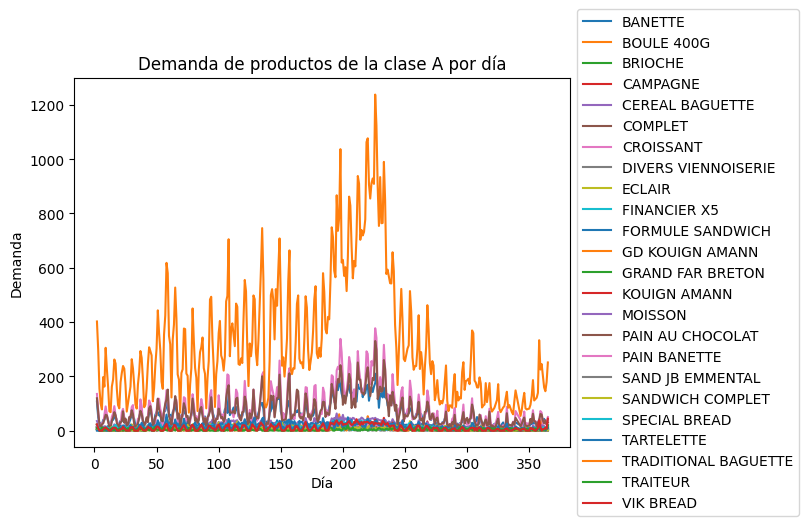

<Figure size 640x480 with 0 Axes>

In [17]:
# Graficar las series de tiempo de los productos de la clase A

import matplotlib.pyplot as plt

# graficar las series de tiempo
for i in range(1, len(df_clase_A_dia_pivot)):
    plt.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])

plt.xlabel("Día")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por día")
plt.legend()

# el grafico se ve mal, porque los label de los productos ocupan mucho espacio
# ocultar los label de los productos (lineas)
plt.legend().set_visible(False)
# y poner una leyenda aparte
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

# guardar el grafico como imagen
plt.savefig("../results/Bakery sales class A by day.png")

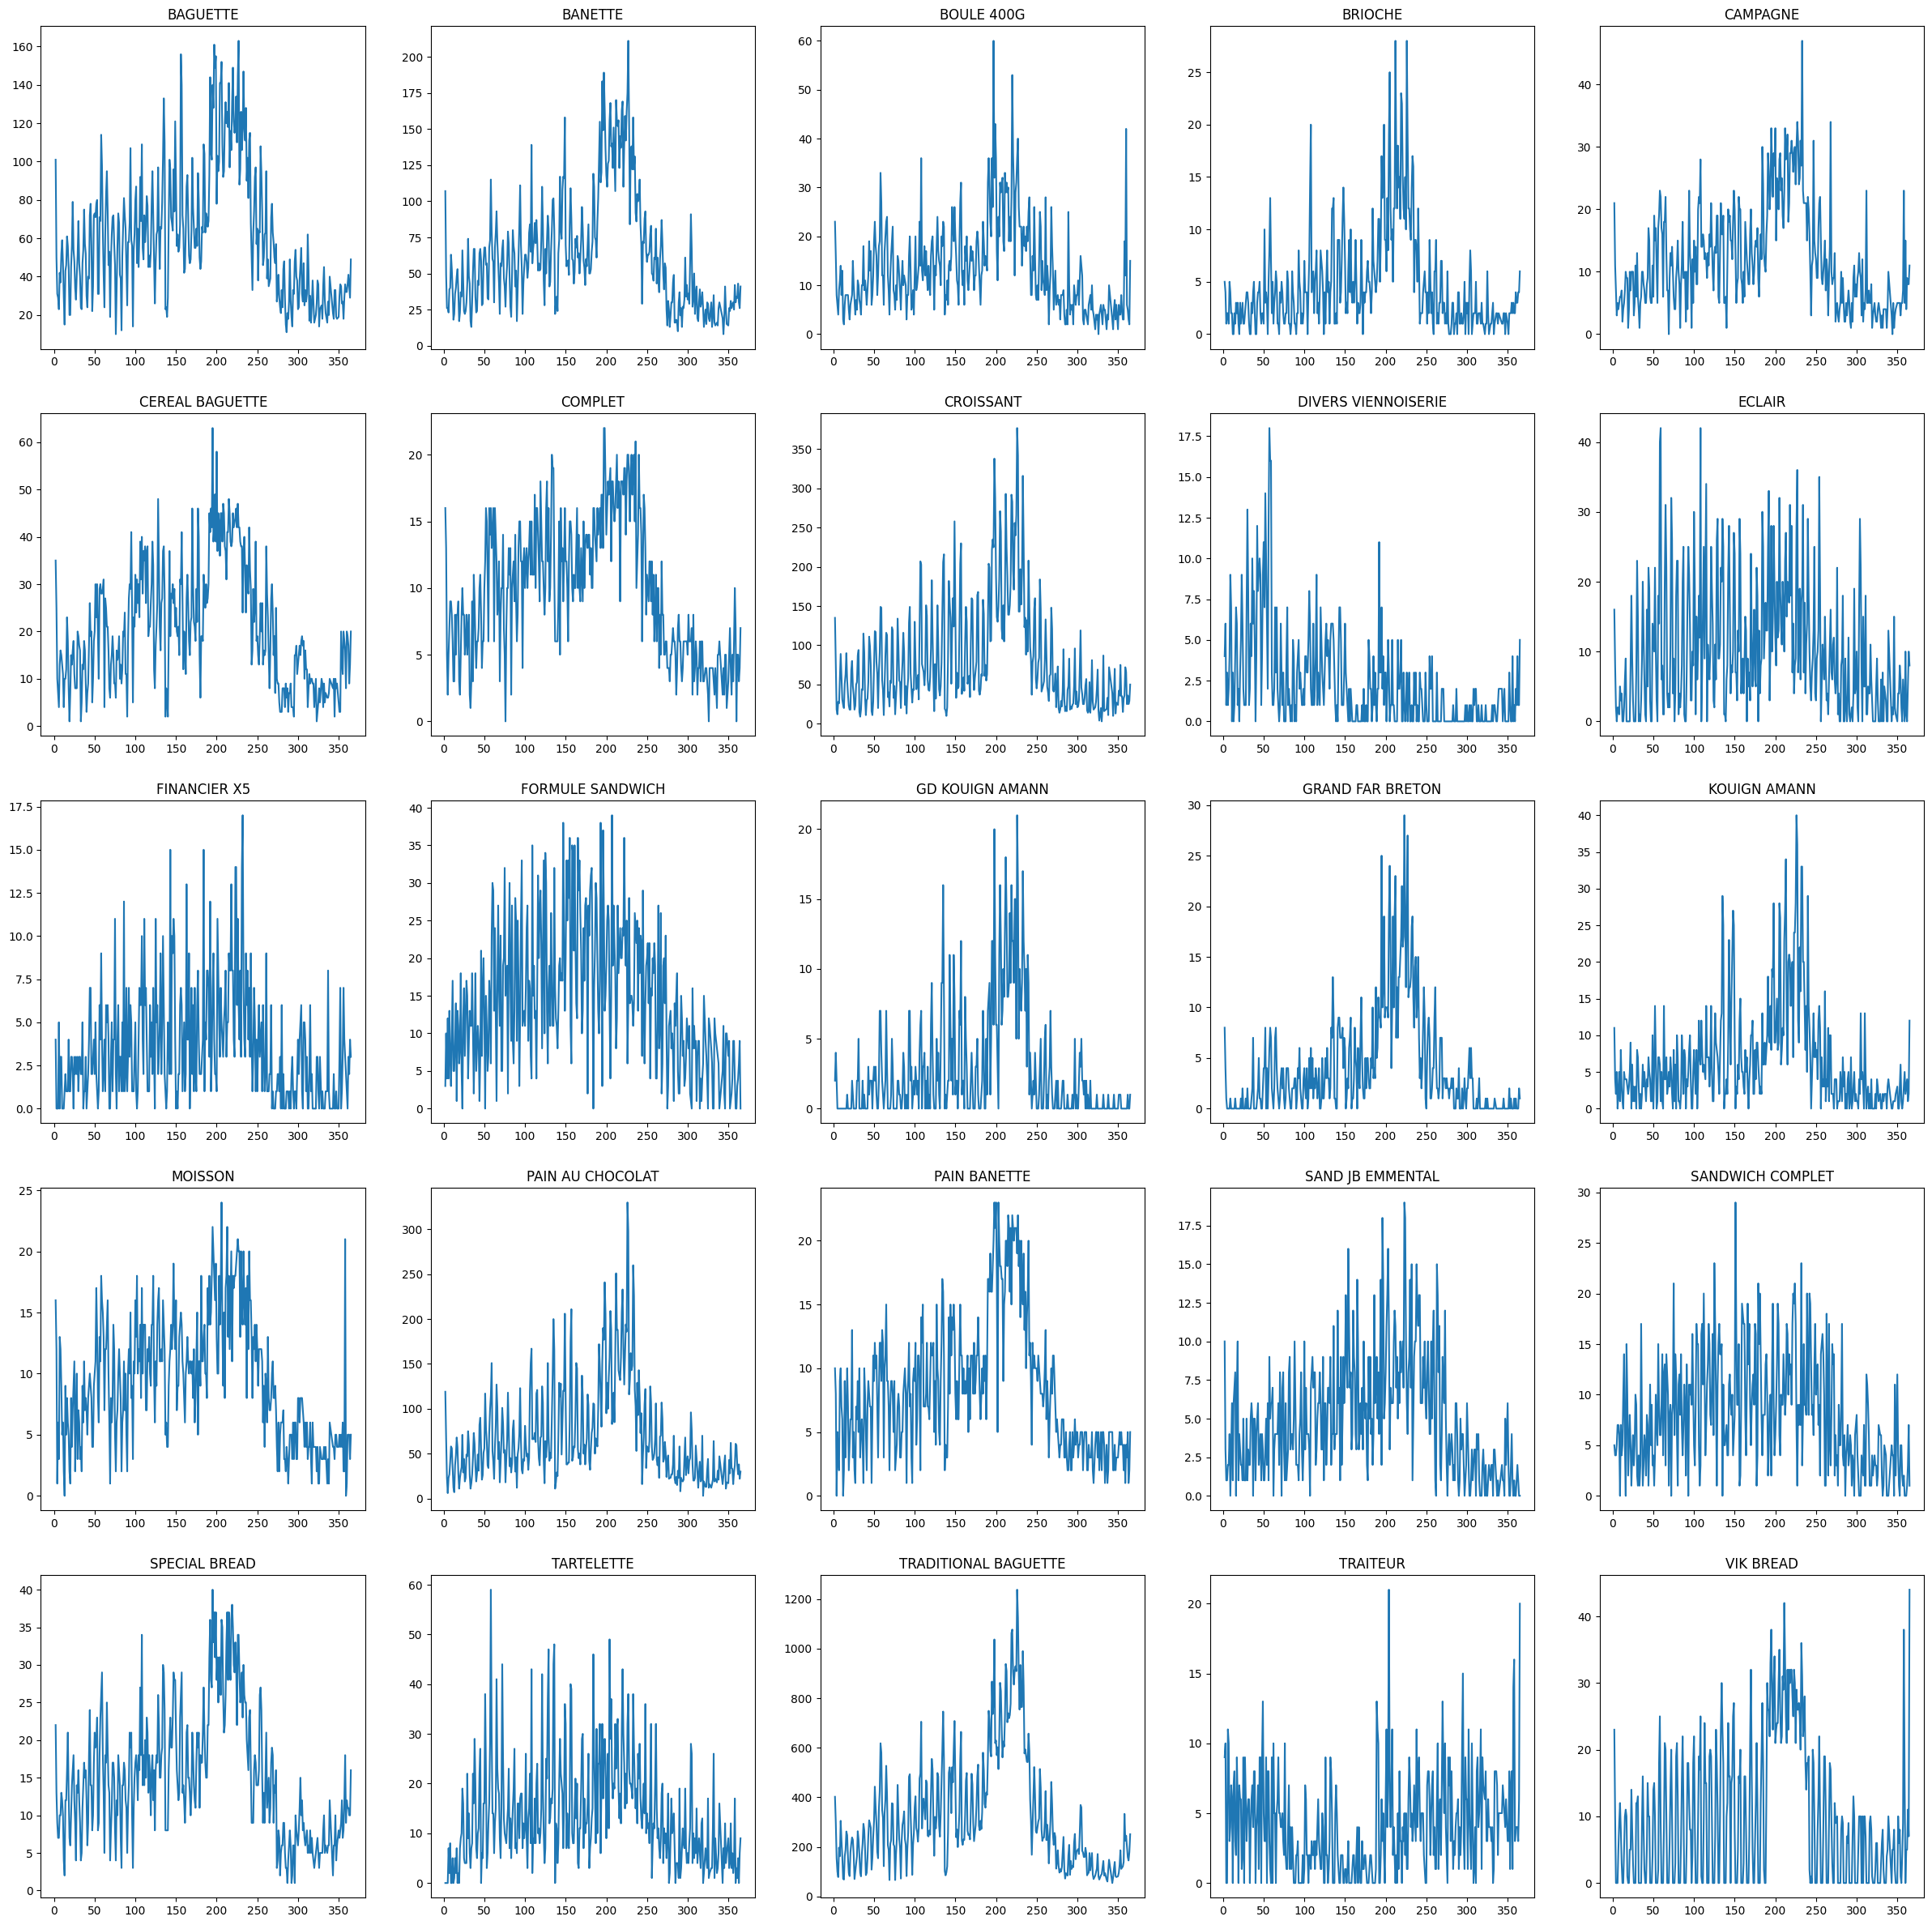

In [18]:
import math

total_articulos = len(df_clase_A_dia_pivot)
n_c = 5
n_f = math.ceil(total_articulos / n_c)

fig, axs = plt.subplots(n_f, n_c, figsize=(30,30))

for i in range(0, len(df_clase_A_dia_pivot)):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_clase_A_dia_pivot.columns[1:], df_clase_A_dia_pivot.iloc[i, 1:], label=df_clase_A_dia_pivot.iloc[i, 0])
    ax.set_title(df_clase_A_dia_pivot.iloc[i, 0])

plt.show()

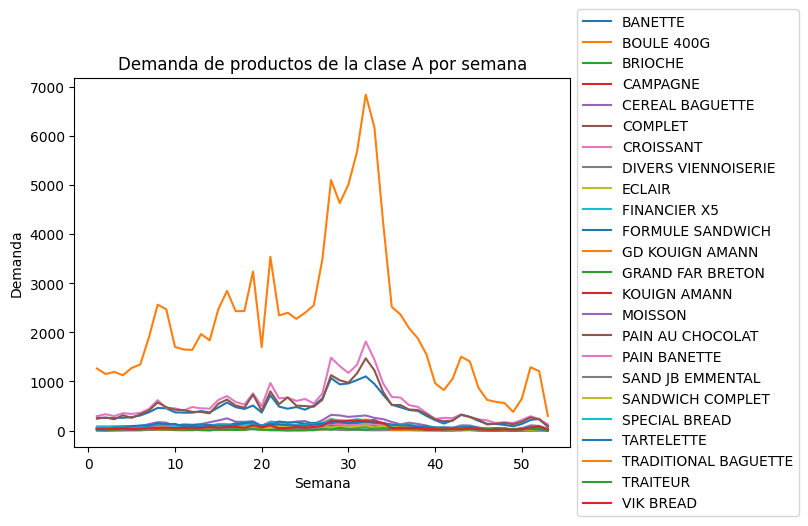

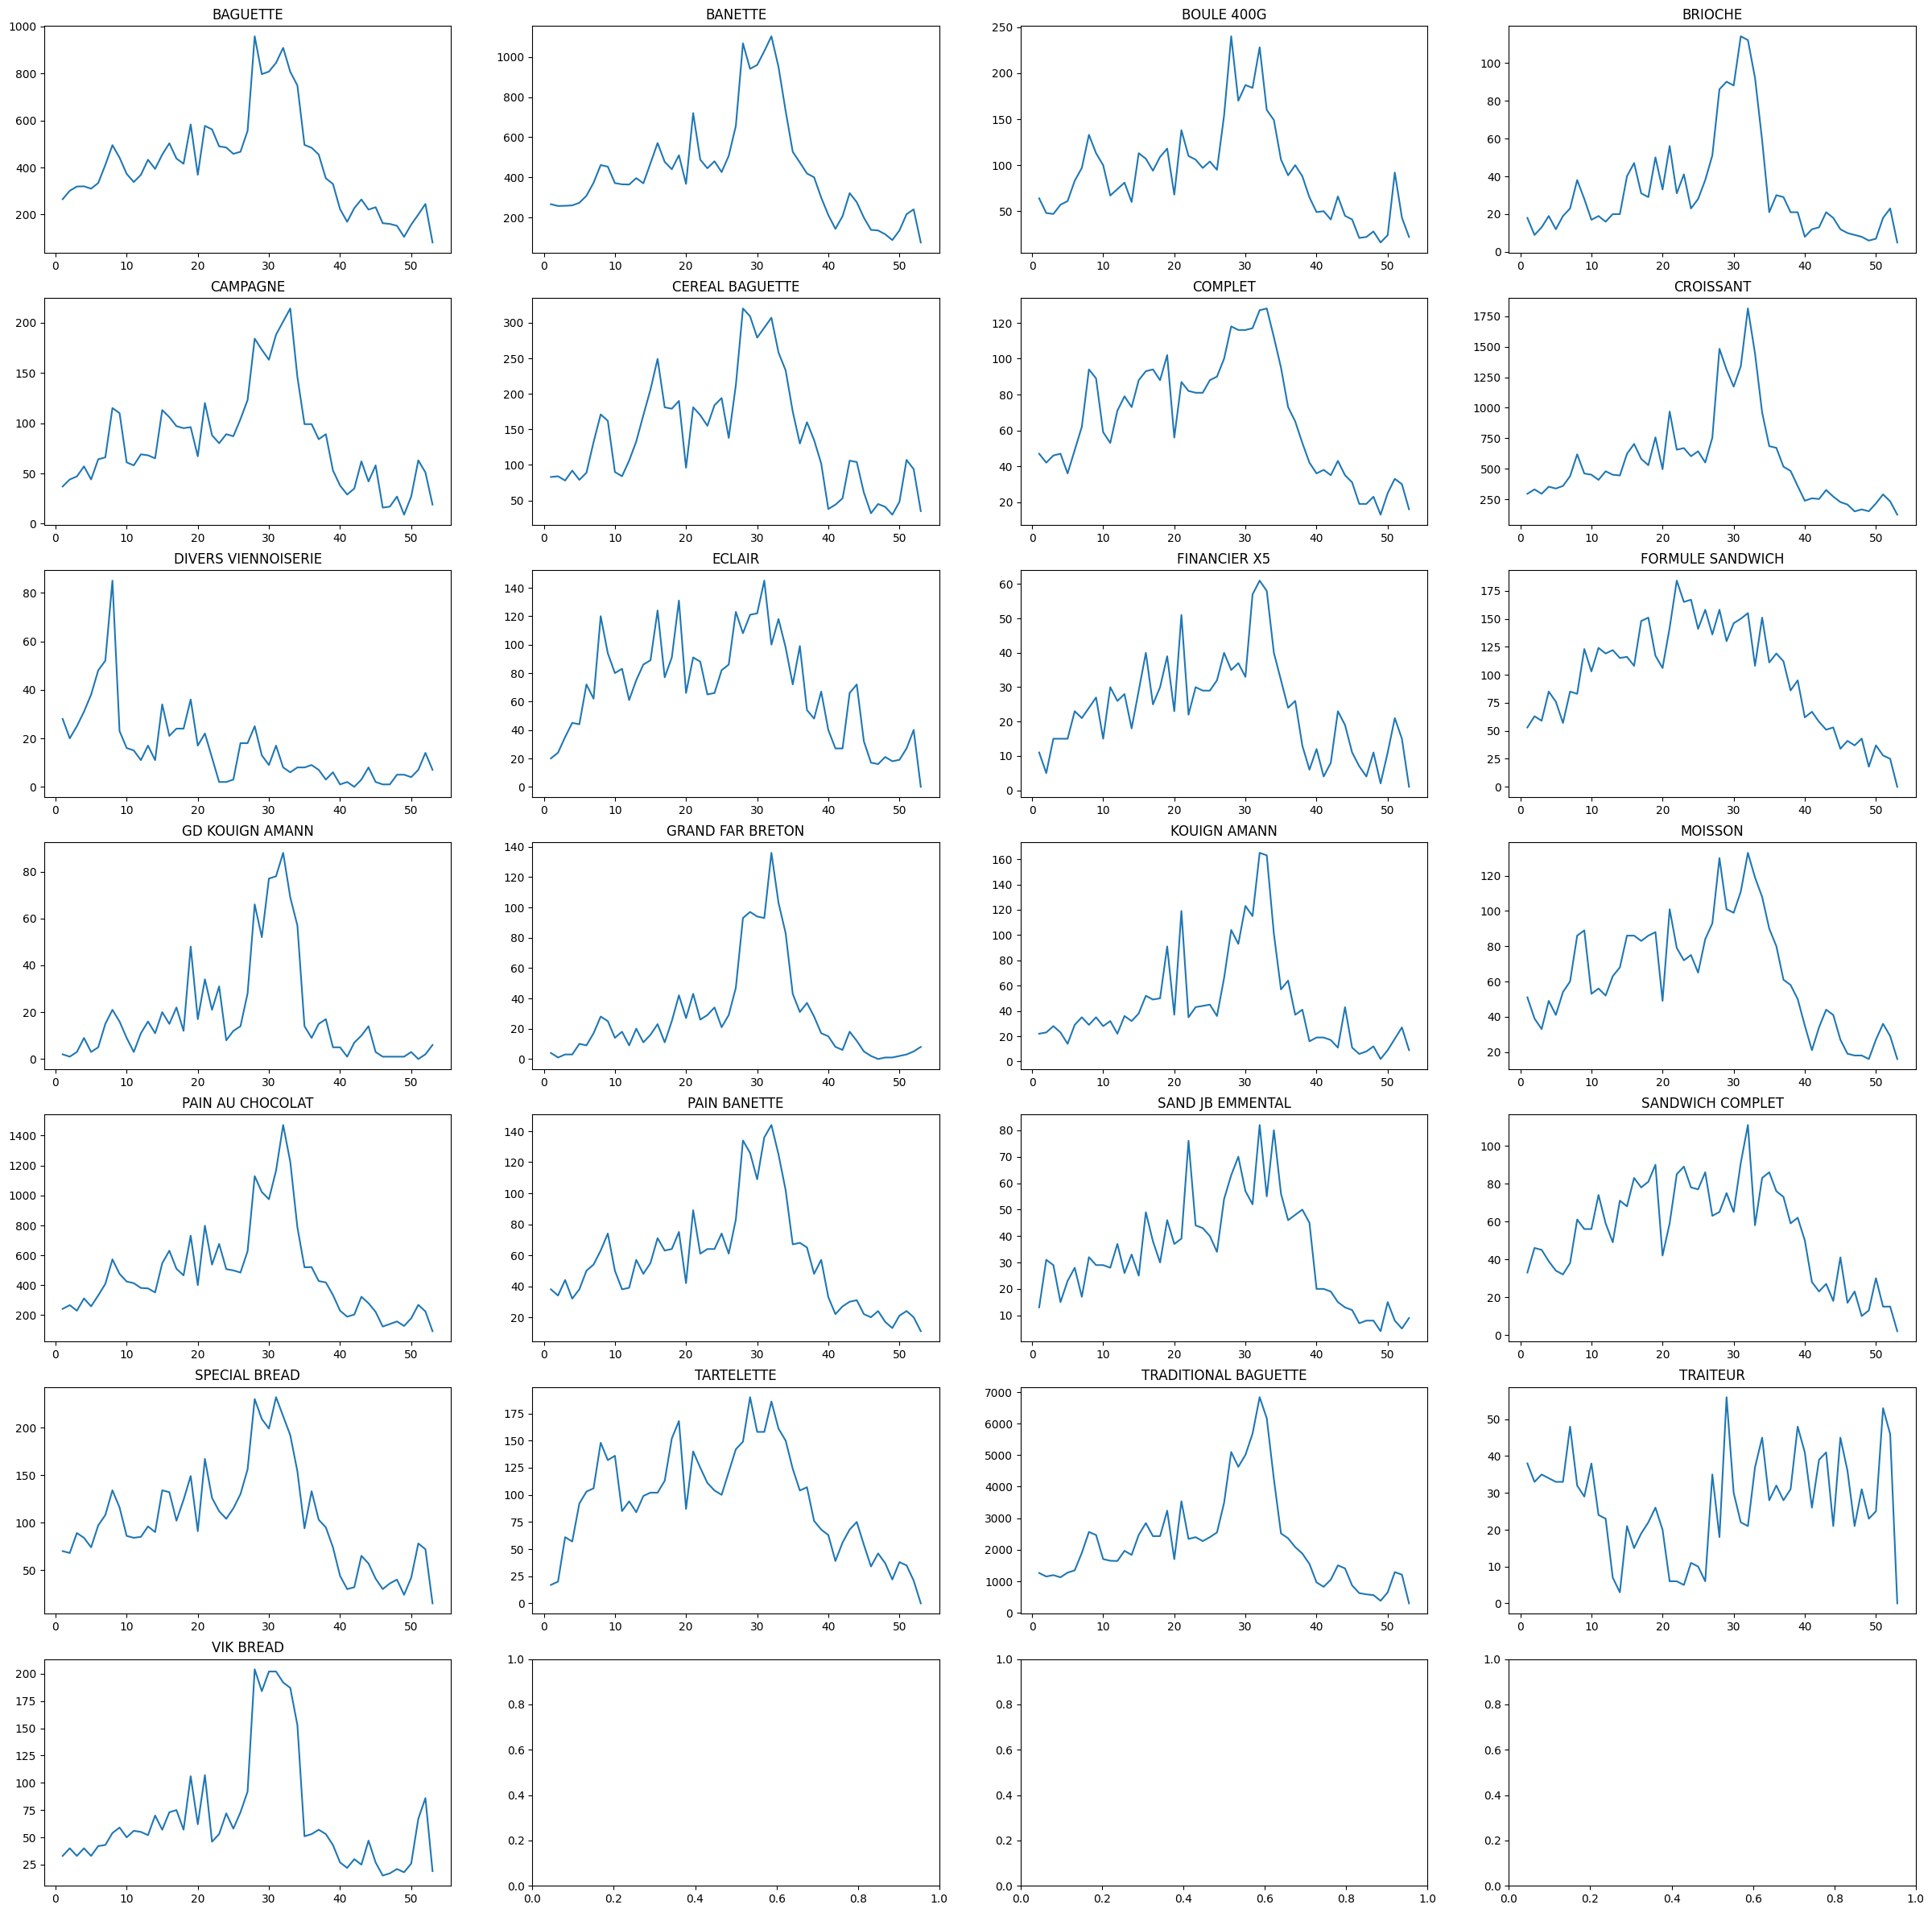

In [19]:
# lo mismo por semana
df_agrupado_semana = df.groupby(["article", "week"])["Quantity"].sum().reset_index()

df_clase_A_semana = pd.merge(df_clase_A, df_agrupado_semana, on="article")

df_clase_A_semana = df_clase_A_semana.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

df_clase_A_semana_pivot = df_clase_A_semana.pivot(index="article", columns="week", values="Quantity").reset_index()

df_clase_A_semana_pivot = df_clase_A_semana_pivot.fillna(0)

df_clase_A_semana_pivot.to_csv("../results/Bakery sales class A by week.csv", index=False)

# graficar las series de tiempo
for i in range(1, len(df_clase_A_semana_pivot)):
    plt.plot(df_clase_A_semana_pivot.columns[1:], df_clase_A_semana_pivot.iloc[i, 1:], label=df_clase_A_semana_pivot.iloc[i, 0])

plt.xlabel("Semana")
plt.ylabel("Demanda")
plt.title("Demanda de productos de la clase A por semana")
plt.legend().set_visible(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Mismo grafico pero para cada uno de los productos y mostrarlo en un mismo grafico como subplots
total_articulos = len(df_clase_A_semana_pivot)
n_c = 4
n_f = math.ceil(total_articulos / n_c)
fig, axs = plt.subplots(n_f, n_c, figsize=(30,30))

for i in range(0, len(df_clase_A_semana_pivot)):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_clase_A_semana_pivot.columns[1:], df_clase_A_semana_pivot.iloc[i, 1:], label=df_clase_A_semana_pivot.iloc[i, 0])
    ax.set_title(df_clase_A_semana_pivot.iloc[i, 0])

plt.show()


In [20]:
# Clasificación de la demanda en deterministoco/probabilistico (V% > 20) y estatico/dinamico.
# La idea es tomar un producto (tal vez solo los AX y AY), y producir una tabla con dos entradas: año y mes -> demanda del periodo de tiempo
# y que se compute la media y desviacion para cada mes entre los diferentes años y finalmente se calcule V% = desviacion / media * 100

# Seleccionar los productos de las clases AX, AY
df_seleccionados = df_abc_xyz[(df_abc_xyz["Tipo"].isin(["A", "B", "C"])) & (df_abc_xyz["XYZ"].isin(["X", "Y"]))]

# Agregar el mes y año al df original
df["month-of-year"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year

# Crear un DataFrame con la demanda por año y mes
df_demanda = df.groupby(["article", "year", "month-of-year"])["Quantity"].sum().reset_index()

# Filtrar los productos seleccionados
df_demanda_seleccionados = pd.merge(df_seleccionados, df_demanda, on="article")

print(df_demanda_seleccionados)

# Calcular la media y desviacion estándar de la demanda por mes
df_demanda_media = df_demanda_seleccionados.groupby(["article", "month-of-year"])["Quantity"].mean().reset_index()

df_demanda_std = df_demanda_seleccionados.groupby(["article", "month-of-year"])["Quantity"].std().reset_index()

# Unir los DataFrames
df_demanda_final = pd.merge(df_demanda_media, df_demanda_std, on=["article", "month-of-year"])

# Renombrar las columnas
df_demanda_final.rename(columns={"Quantity_x": "mean", "Quantity_y": "std"}, inplace=True)

# Calcular el coeficiente de variacion
df_demanda_final["V%"] = df_demanda_final["std"] / df_demanda_final["mean"] * 100

print(df_demanda_final)

# Guardar el resultado
df_demanda_final.to_csv("../results/Bakery sales demand classification.csv", index=False)

        article Tipo XYZ  year  month-of-year  Quantity
0          PAIN    B   Y  2021              1      89.0
1          PAIN    B   Y  2021              2      90.0
2          PAIN    B   Y  2021              3     116.0
3          PAIN    B   Y  2021              4     129.0
4          PAIN    B   Y  2021              5     111.0
..          ...  ...  ..   ...            ...       ...
58  CAFE OU EAU    B   Y  2022              5      99.0
59  CAFE OU EAU    B   Y  2022              6     104.0
60  CAFE OU EAU    B   Y  2022              7     120.0
61  CAFE OU EAU    B   Y  2022              8     117.0
62  CAFE OU EAU    B   Y  2022              9      61.0

[63 rows x 6 columns]
        article  month-of-year   mean        std         V%
0     BANETTINE              1  107.5   7.778175   7.235511
1     BANETTINE              2  121.0   1.414214   1.168772
2     BANETTINE              3  138.5   0.707107   0.510546
3     BANETTINE              4  152.5   4.949747   3.245736
4    

In [21]:
# Agregar la clasificación de la demanda en probabilidad si alguna V% > 20 y deterministico sino
def clasificar_demanda(row):
    if not any(df_demanda_final['article'] == row['article']):
        return '-'
        
    if any(df_demanda_final[df_demanda_final['article'] == row['article']]['V%'] > 20):
        return 'Probabilistico'
    else:
        return 'Deterministico'

df_abc_xyz['Clasificacion'] = df_abc_xyz.apply(clasificar_demanda, axis=1)

print(df_abc_xyz.head())

# guardar
df_abc_xyz.to_csv("../results/Bakery sales final + clasiffication.csv", index=False)

                article Tipo XYZ Clasificacion
0  TRADITIONAL BAGUETTE    A   Z             -
1      FORMULE SANDWICH    A   Z             -
2             CROISSANT    A   Z             -
3      PAIN AU CHOCOLAT    A   Z             -
4               BANETTE    A   Z             -


# Ingredientes

In [22]:
# Primero un dataset de articulo y demanda por date

# agrupar por "date", sumando la demanda total de ese dia
df_agrupado_date = df.groupby(["article", "date"])["Quantity"].sum().reset_index()

# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_abc[df_abc["Tipo"] == "A"]

df_clase_A_date = pd.merge(df_clase_A[["article"]], df_agrupado_date, on="article")

print(df_clase_A_date.head())

print(df_clase_A_date.info())

# Para facilitar la busqueda:
# Ahora hacemos otro dataframe con un indice en date y las columnas son las "Quantity" de articulos
df_clase_A_date = df_clase_A_date.pivot(index="date", columns="article", values="Quantity")

df_clase_A_date.fillna(0, inplace=True)

print(df_clase_A_date.head())

                article        date  Quantity
0  TRADITIONAL BAGUETTE  2021-01-02     128.0
1  TRADITIONAL BAGUETTE  2021-01-03     171.0
2  TRADITIONAL BAGUETTE  2021-01-04     128.0
3  TRADITIONAL BAGUETTE  2021-01-05      99.0
4  TRADITIONAL BAGUETTE  2021-01-07     109.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12911 entries, 0 to 12910
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   article   12911 non-null  object 
 1   date      12911 non-null  object 
 2   Quantity  12911 non-null  float64
dtypes: float64(1), object(2)
memory usage: 302.7+ KB
None
article     BAGUETTE  BANETTE  BOULE 400G  BRIOCHE  CAMPAGNE  CEREAL BAGUETTE  \
date                                                                            
2021-01-02      46.0     40.0        11.0      2.0      10.0             19.0   
2021-01-03      35.0     35.0        11.0      3.0       9.0             16.0   
2021-01-04      30.0     24.0         

In [23]:
# Load the ingredients CSV file
df_ingredientes = pd.read_csv("../data/Ingredientes productos (A) - Ingredientes.csv", index_col=0)

# Eliminar columna Unidad
df_ingredientes = df_ingredientes.drop(columns=["Unidad"])


print("DF INGREDIENTE\n\n:", df_ingredientes.head())

"""
     Ingrediente  Unidad  Traditional Baguette  Formule Sandwich  Croissant  \
0  Harina de trigo  gramos                   500               300        250   
1              Sal  gramos                    10                 5          5   
2         Levadura  gramos                     5                 5          0   
3      Mantequilla  gramos                     0                 0        150   
4           Azúcar  gramos                     0                10         20   
5        Chocolate  gramos                     0                 0          0   
6         Emmental  gramos                     0                 0          0   
7            Pasas  gramos                     0                 0          0   
8            Leche      ml                     0                50         20   
"""
print(df_clase_A_date.info())

"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 358 entries, article to 365
dtypes: float64(357), object(1)
memory usage: 70.1+ KB
"""

# interseccion de los nombres de articulos A y los nombre de articulos que aparecen en df_ingredientes
result = set(df_clase_A_date.columns[1:]) & set(df_ingredientes.columns[1:])
print("\n\nTEST NOMBRES 1: ", result)

# convertir los todos los nombres de los articulos al mismo case en ambos dataframe
df_ingredientes.columns = df_ingredientes.columns.str.upper()

# quitar los articulos de df_ingredientes que no sean clase A
df_ingredientes = df_ingredientes.drop(columns=set(df_ingredientes.columns[1:]) - set(df_clase_A_date.columns[1:]))

# repetir el experimento y debe dar la cantidad que hay en A
result = set(df_clase_A_date.columns[1:]) & set(df_ingredientes.columns[1:])
print("TEST NOMBRES 2: ", len(result),result)

# generamos un nuevo dataframe para calcular la demanda por dia de los ingredientes basado en el uso de cada articulo y la demanda de ese articulo en ese dia
# 1. Hacer un pivot para que los ingredientes sean las columas y la primer columna sea "articulo"
df_ingredientes = df_ingredientes.T

print("\n\nDF INGREDIENTE TRANSPUESTA\n\n:", df_ingredientes.head())

DF INGREDIENTE

:                  Traditional Baguette  Formule Sandwich  Croissant  \
Ingrediente                                                          
Harina de trigo                   500               300        250   
Sal                                10                 5          5   
Levadura                            5                 5          0   
Mantequilla                         0                 0        150   
Azúcar                              0                10         20   

                 Pain au Chocolat  Banette  Baguette  Sandwich Complet  \
Ingrediente                                                              
Harina de trigo               250      500       500               250   
Sal                             5       10        10                 3   
Levadura                        0        5         5                 2   
Mantequilla                   150        0         0                50   
Azúcar                          0        0     

In [24]:
print(df_ingredientes.loc[:, "Harina de trigo"])

articulos_usan_harina = df_ingredientes.loc[:, "Harina de trigo"].index.to_list()

print("\n\narticulos_usan_harina:", articulos_usan_harina)

print("\n\ndemanda Croissant: 2021-01-02", df_clase_A_date.loc["2021-01-02", "CROISSANT"])

# ejemplo, demanda de harina en 2021-01-02
print("\n\nDemanda articulos_usan_harina 2021-01-02:", df_clase_A_date.loc["2021-01-02", articulos_usan_harina])
print("\n\nDemanda de harina * cantidad necesaria 2021-01-02:", df_clase_A_date.loc["2021-01-02", articulos_usan_harina] * df_ingredientes.loc[:, "Harina de trigo"])

# esto funciona porque los articulos estan ordenados de la misma forma en ambos dataframe

TRADITIONAL BAGUETTE    500
FORMULE SANDWICH        300
CROISSANT               250
PAIN AU CHOCOLAT        250
BANETTE                 500
SANDWICH COMPLET        250
SPECIAL BREAD           400
TRAITEUR                300
GRAND FAR BRETON        200
CEREAL BAGUETTE         500
VIK BREAD               500
BRIOCHE                 300
CAMPAGNE                500
GD KOUIGN AMANN         300
BOULE 400G              400
ECLAIR                  100
MOISSON                 500
SAND JB EMMENTAL        300
COMPLET                 400
KOUIGN AMANN            300
PAIN BANETTE            500
DIVERS VIENNOISERIE     300
FINANCIER X5            200
Name: Harina de trigo, dtype: int64


articulos_usan_harina: ['TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'CROISSANT', 'PAIN AU CHOCOLAT', 'BANETTE', 'SANDWICH COMPLET', 'SPECIAL BREAD', 'TRAITEUR', 'GRAND FAR BRETON', 'CEREAL BAGUETTE', 'VIK BREAD', 'BRIOCHE', 'CAMPAGNE', 'GD KOUIGN AMANN', 'BOULE 400G', 'ECLAIR', 'MOISSON', 'SAND JB EMMENTAL', 'COMPLET

In [25]:
# Crear un nuevo dataframe que contenga solo los ingredientes como filas y los días como columnas
dias = df["date"].unique()
dias.sort()

print("Cantidad de dias: ", len(dias))

df_demanda_ingrediente = pd.DataFrame(index=df_ingredientes.columns[1:], columns=dias)

# Inicializar el dataframe con ceros
df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)

for ingrediente, serie in df_ingredientes.items():
    consumo_x_articulo = serie
    articulos_usan_ingrediente = serie.index.to_list()
    for dia in dias:
        df_demanda_ingrediente.loc[ingrediente, dia] = (df_clase_A_date.loc[dia, articulos_usan_harina] * df_ingredientes.loc[:, ingrediente]).sum()
        
#print(df_demanda_ingrediente.head())

df_demanda_ingrediente = df_demanda_ingrediente.T

print(df_demanda_ingrediente.head())

# eliminar pasas y Emmental
df_demanda_ingrediente = df_demanda_ingrediente.drop(columns=["Pasas", "Emmental"])

# guardar
df_demanda_ingrediente.to_csv("../results/Bakery sales ingredientes por dia.csv")

Cantidad de dias:  600


/tmp/ipykernel_7971/3466564210.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)


Ingrediente     Sal  Levadura  Mantequilla  Azúcar  Chocolate  Emmental  \
2021-01-02   3193.0    1313.0      22880.0  3190.0     4800.0     900.0   
2021-01-03   3361.0    1440.0      19750.0  2360.0     4500.0       0.0   
2021-01-04   2058.0     980.0       7420.0  1040.0     1700.0     100.0   
2021-01-05   1828.0     926.0       5420.0  1110.0      600.0     100.0   
2021-01-07   1831.0     893.0       5950.0   810.0     1500.0       0.0   

Ingrediente  Pasas   Leche  Harina de trigo  
2021-01-02     0.0  5320.0         159300.0  
2021-01-03     0.0  4270.0         166500.0  
2021-01-04     0.0  1790.0         102400.0  
2021-01-05     0.0  2080.0          91650.0  
2021-01-07     0.0  1990.0          91000.0  


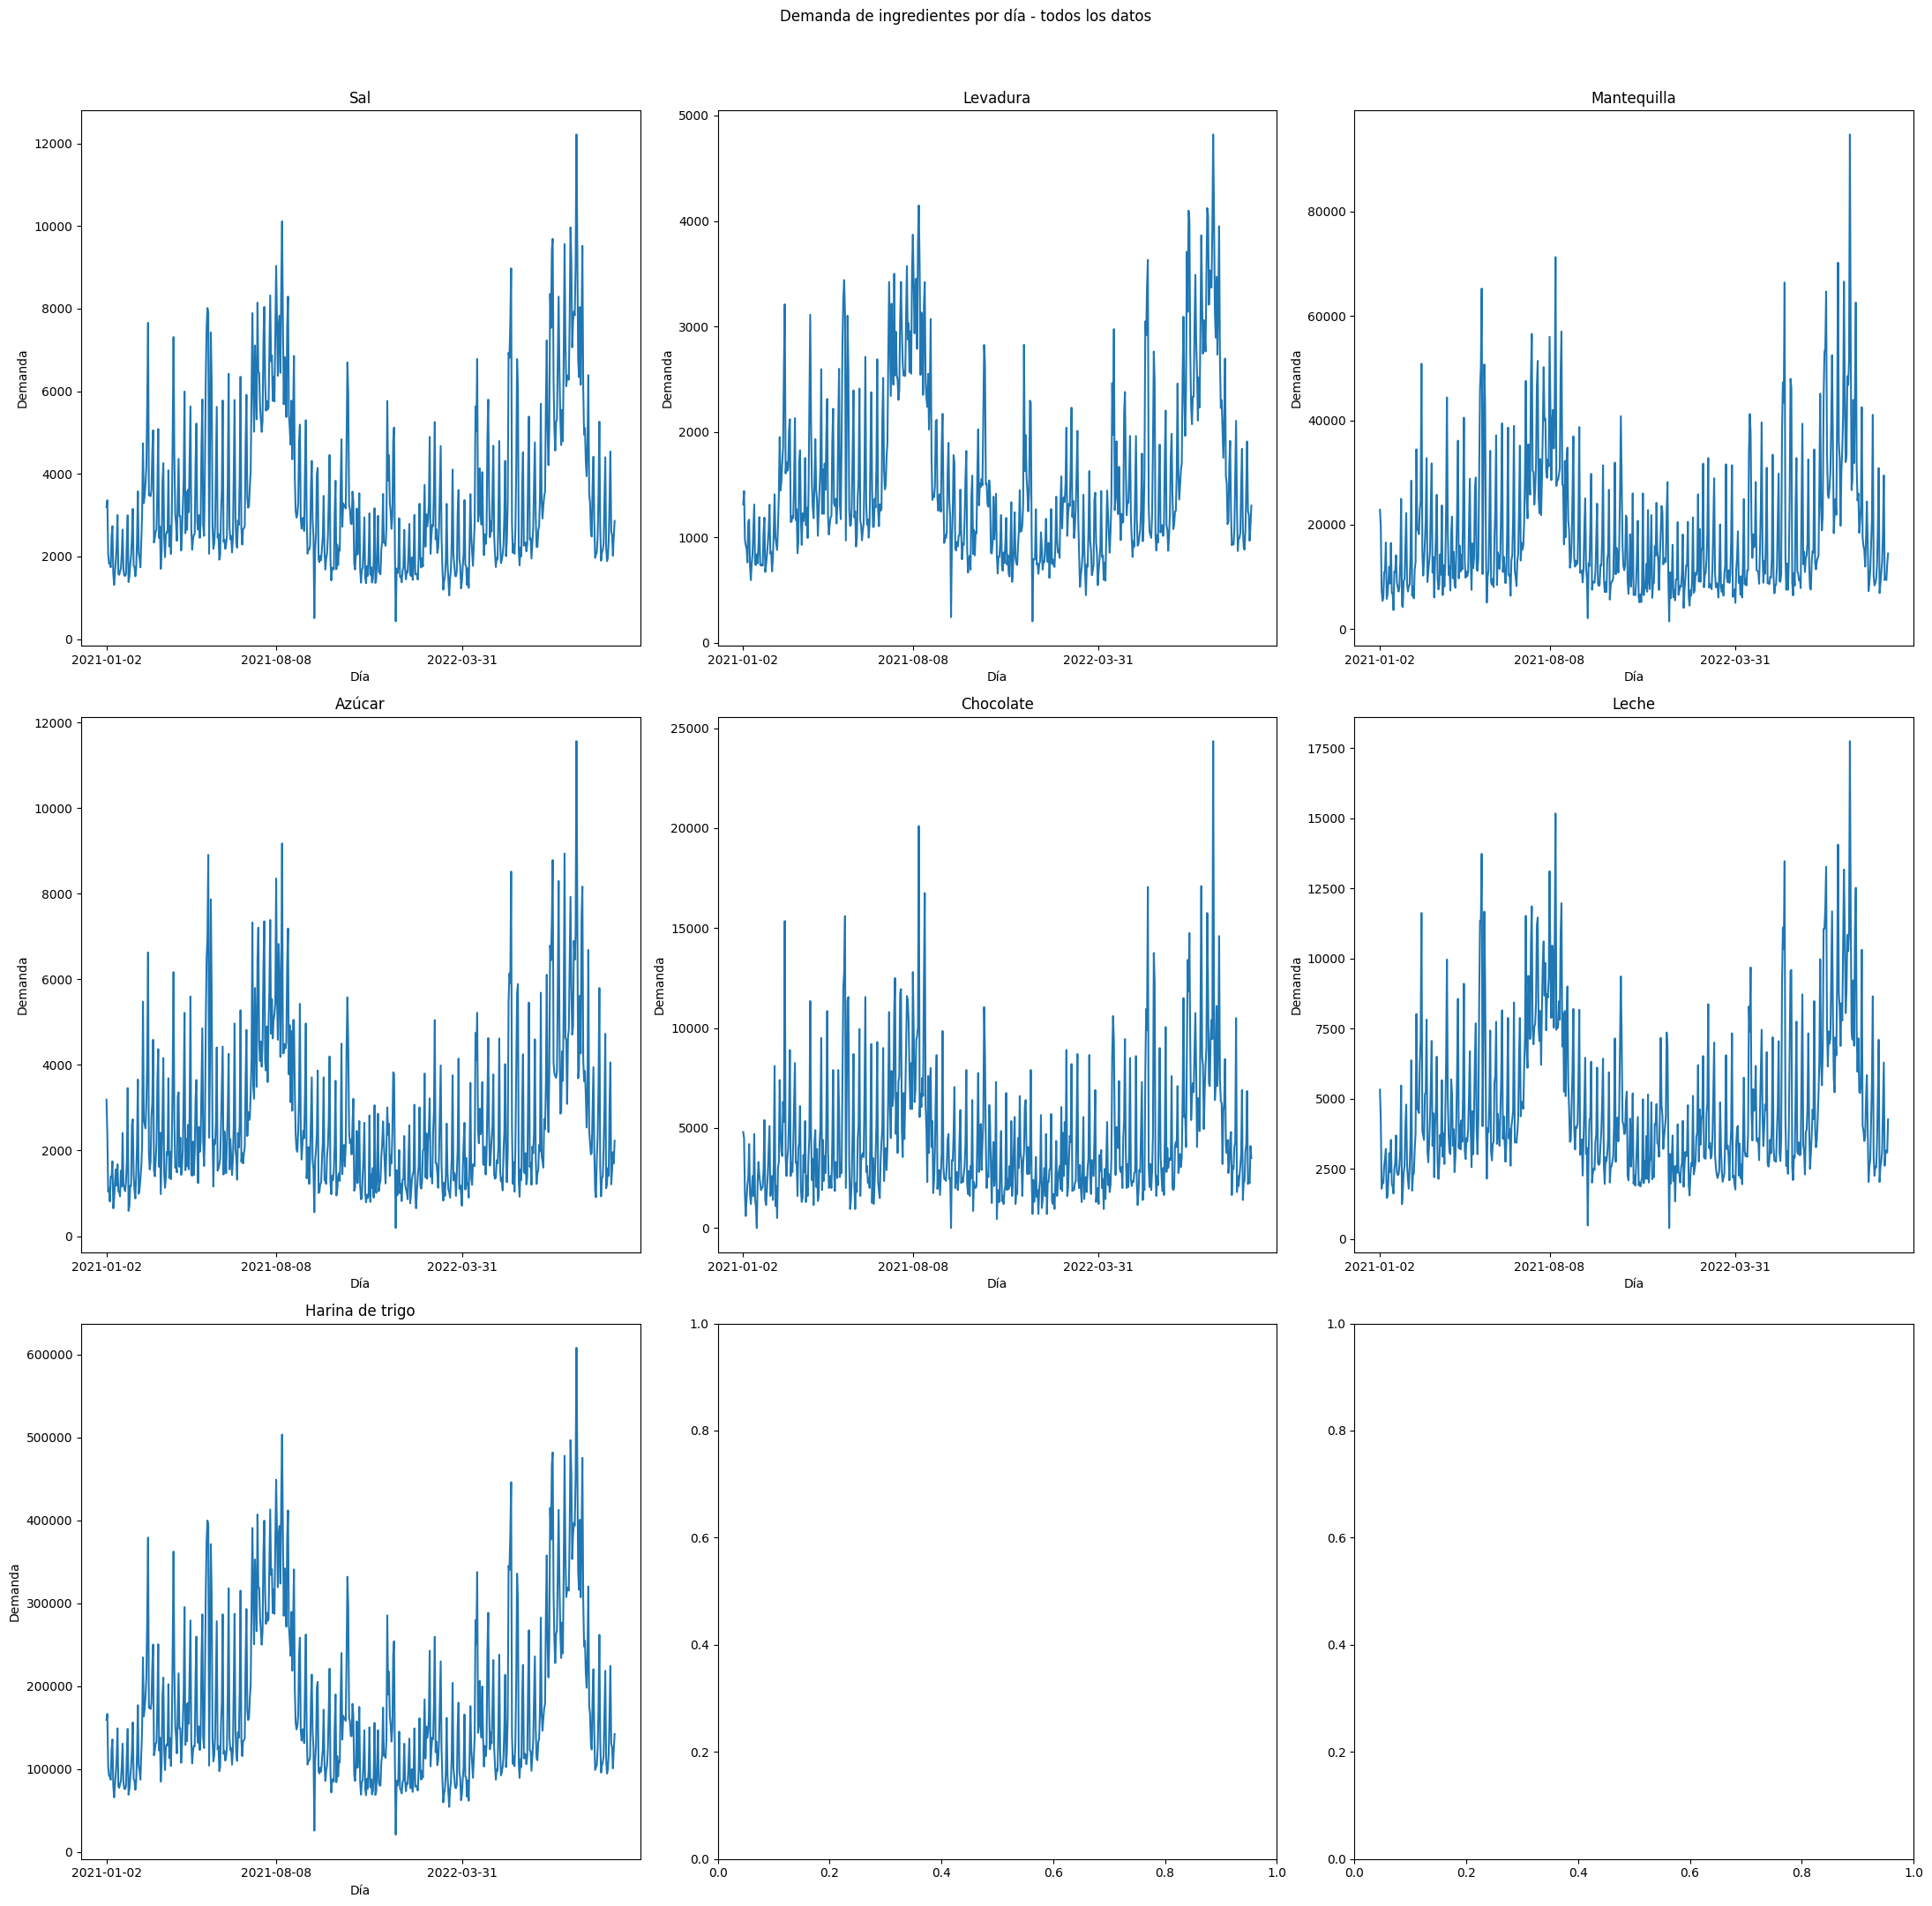

In [26]:
import math
import matplotlib.pyplot as plt

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente.columns) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(22, 22))

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente.columns):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_demanda_ingrediente.index, df_demanda_ingrediente[ingrediente])
    ax.set_title(ingrediente)
    ax.set_xlabel("Día")
    ax.set_ylabel("Demanda")
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], '2022-03-31'])
    ax.set_xticklabels([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], '2022-03-31'])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - todos los datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

## Pronostico de demanda de ingrediente

fuente https://forecastegy.com/posts/multiple-time-series-forecasting-with-holt-winters-in-python

In [27]:
%pip install statsforecast


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
if df_demanda_ingrediente.columns[0] != "ds":
    # "StatsForecast expects the data to have at least 3 columns: ds, unique_id, and y."
    # usar el indice default
    df_demanda_ingrediente = df_demanda_ingrediente.reset_index()
    df_demanda_ingrediente = df_demanda_ingrediente.rename(columns={"index": "ds"})
    df_demanda_ingrediente = df_demanda_ingrediente.melt(id_vars="ds", var_name="unique_id", value_name="y")

# "The model won’t work if you have zeros, negative, or missing values in the data."
# si hay un 0, se reemplaza por el promedio de los dos valores anteriores y siguientes
for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] == 0:
        df_demanda_ingrediente.loc[i, "y"] = (df_demanda_ingrediente.loc[i - 1, "y"] + df_demanda_ingrediente.loc[i + 1, "y"]) / 2

for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] < 1:
        print("Hay un 0 en el indice ", i)

df_demanda_ingrediente = df_demanda_ingrediente.sort_values(by="ds")

# ds debe ser tipo datetime
df_demanda_ingrediente['ds'] = pd.to_datetime(df_demanda_ingrediente['ds'])

print(df_demanda_ingrediente.head())

             ds        unique_id         y
0    2021-01-02              Sal    3193.0
2400 2021-01-02        Chocolate    4800.0
1800 2021-01-02           Azúcar    3190.0
3600 2021-01-02  Harina de trigo  159300.0
600  2021-01-02         Levadura    1313.0


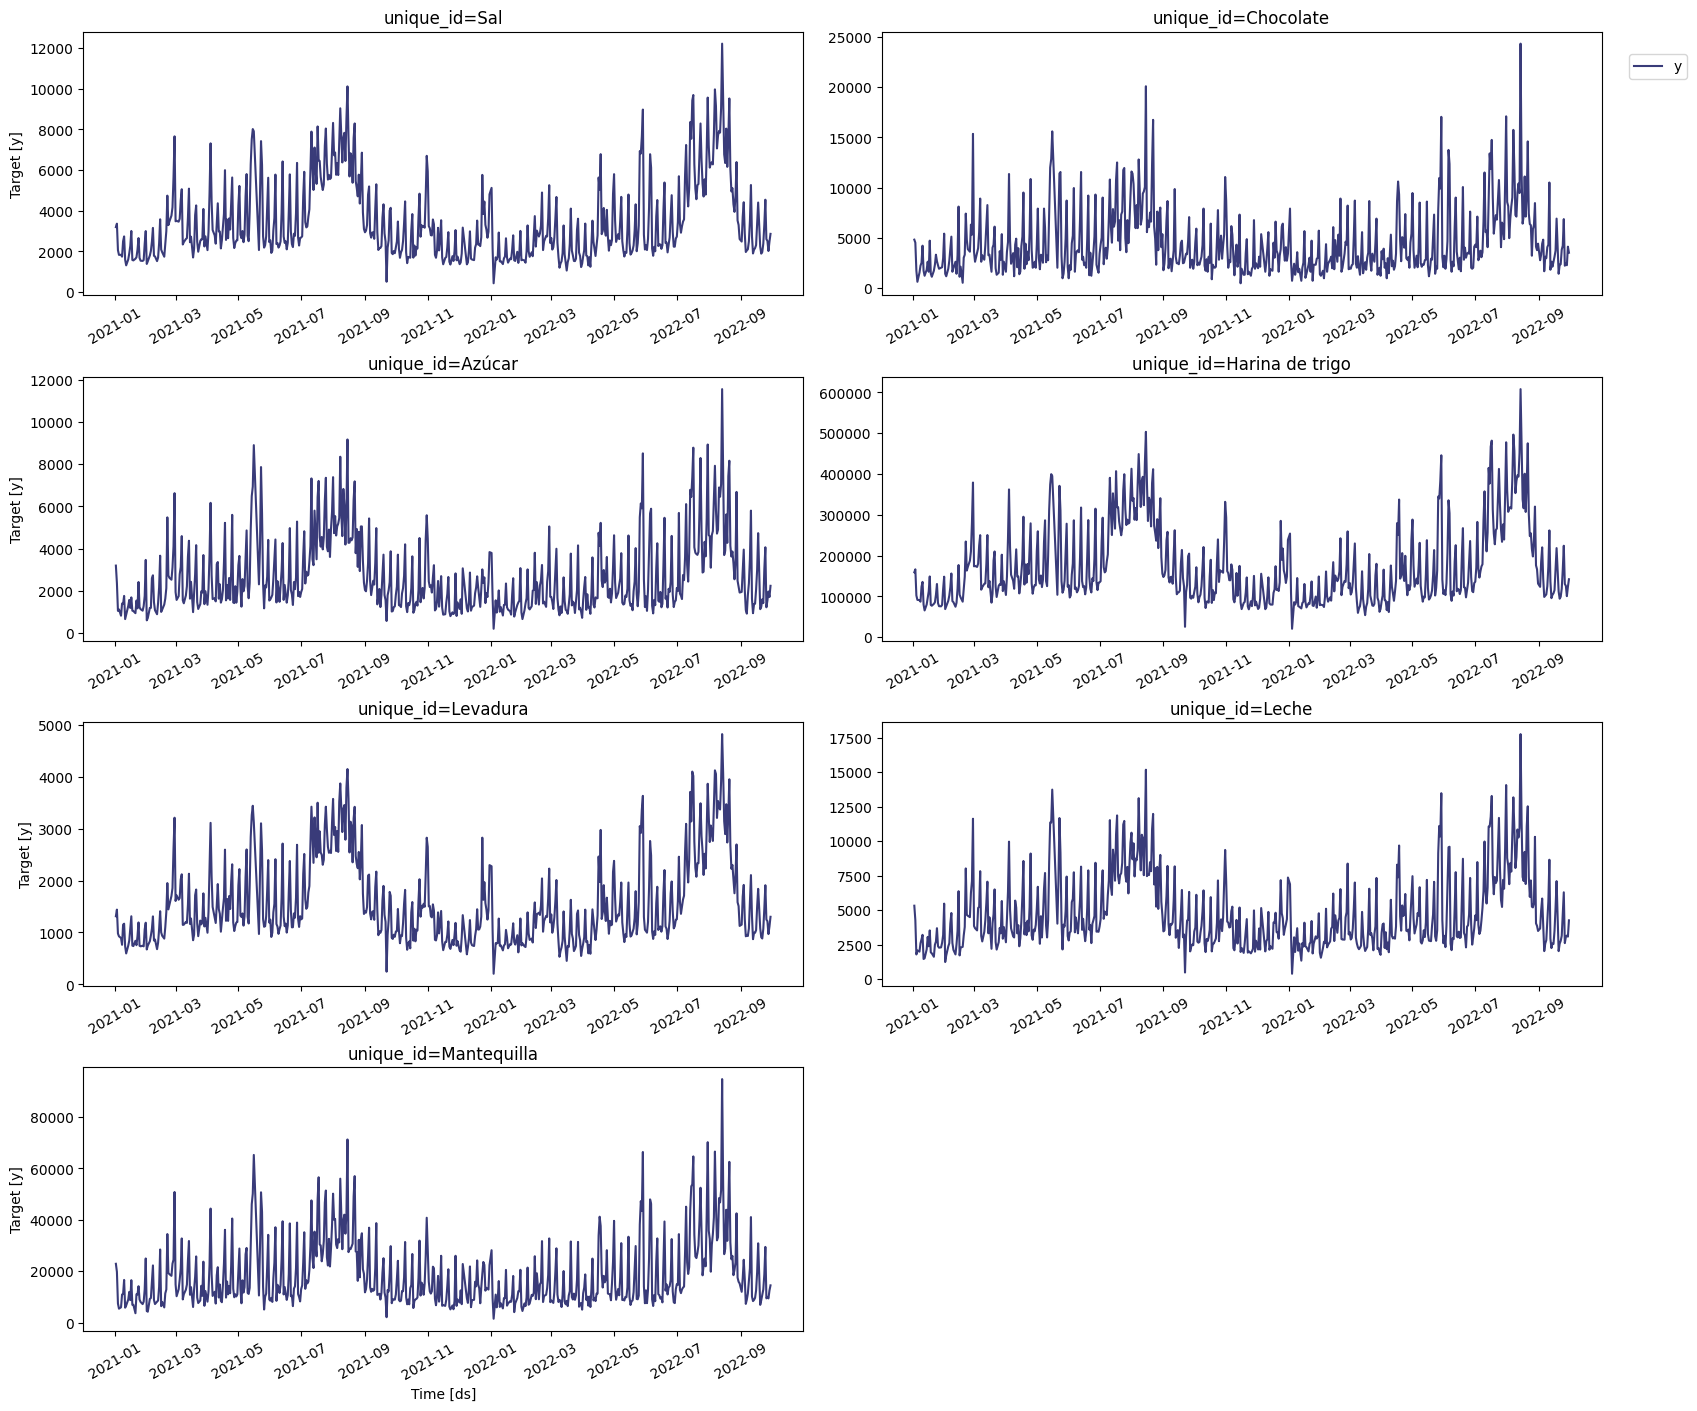

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df_demanda_ingrediente)

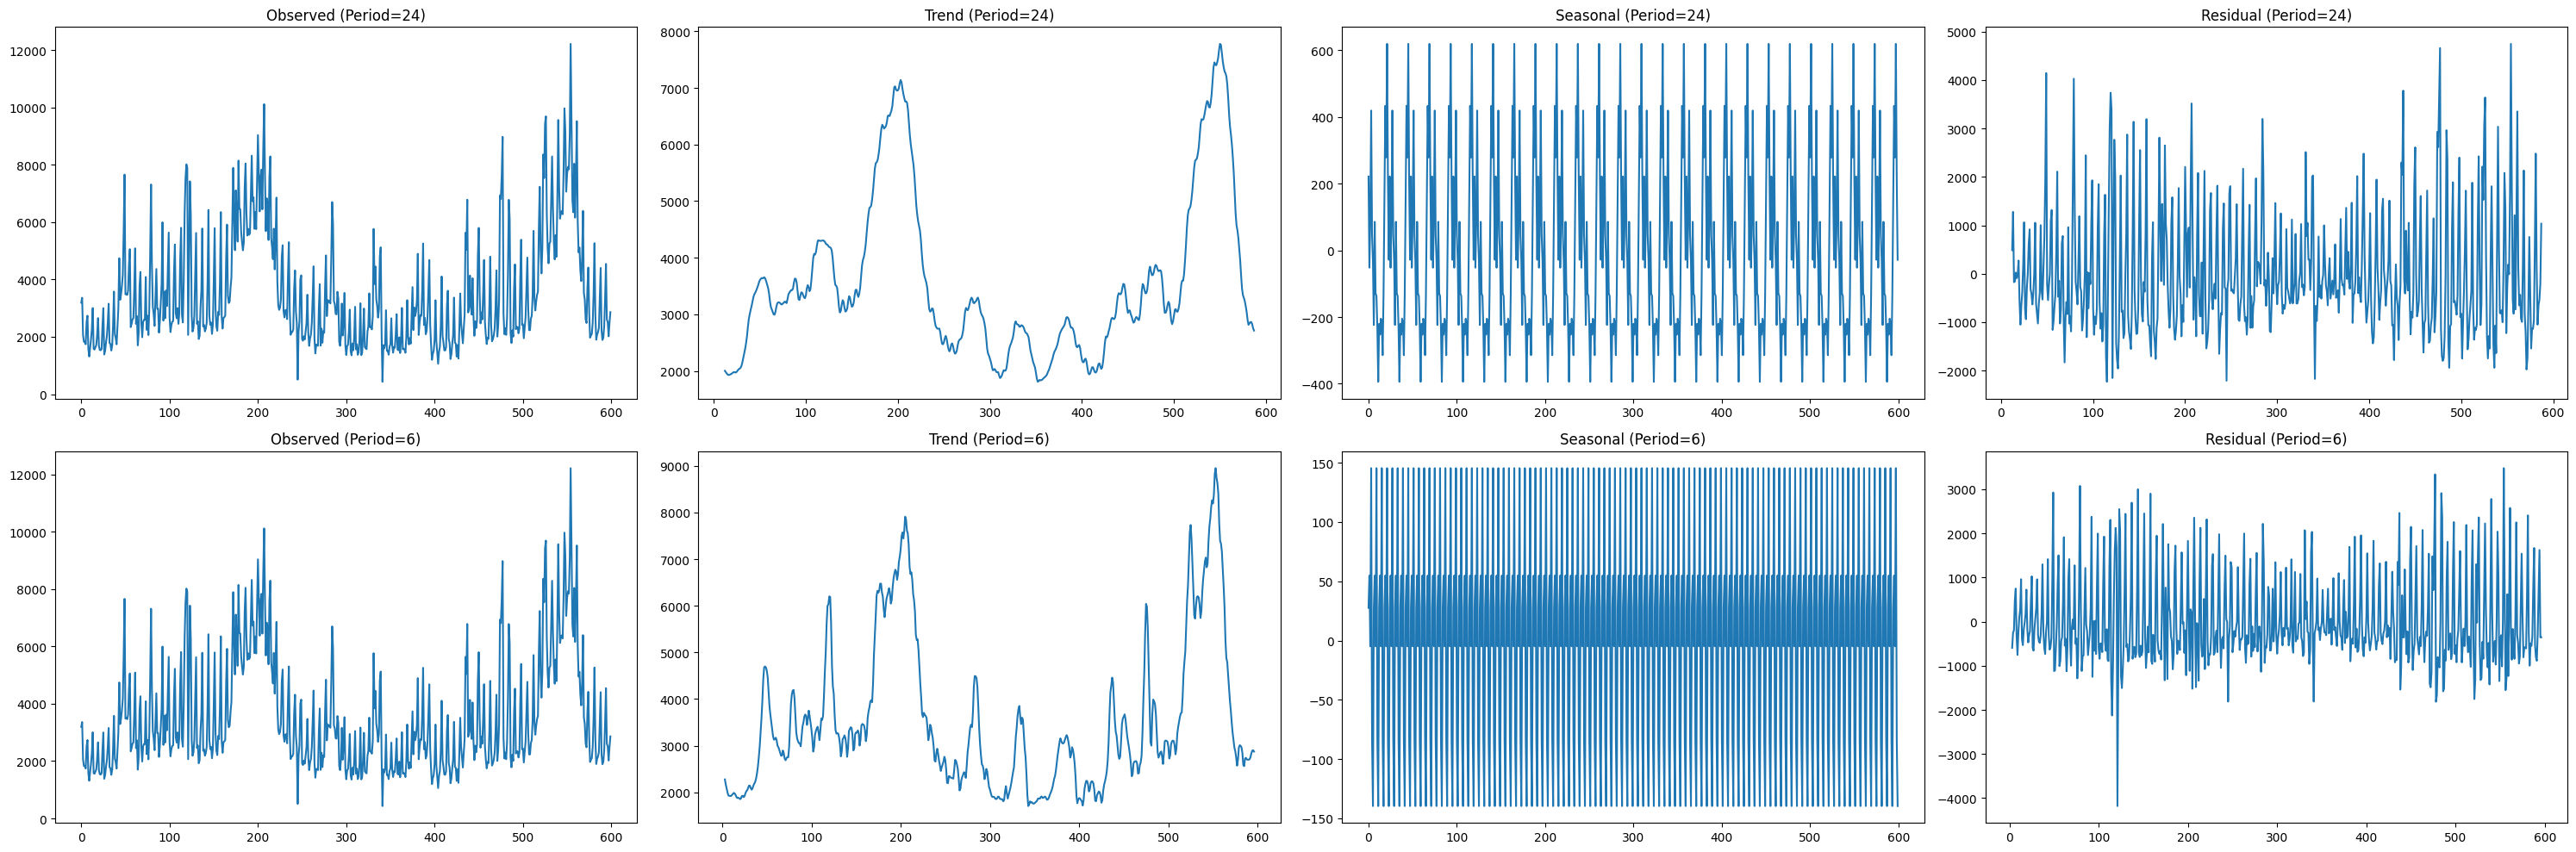

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

a = seasonal_decompose(df_demanda_ingrediente.loc[df_demanda_ingrediente["unique_id"] == "Sal"]["y"], model="additive", period=24)
# a.plot();
b = seasonal_decompose(df_demanda_ingrediente.loc[df_demanda_ingrediente["unique_id"] == "Sal"]["y"], model="additive", period=6)

fig, axs = plt.subplots(2, 4, figsize=(30, 10))

a.observed.plot(ax=axs[0, 0], title='Observed (Period=24)')
a.trend.plot(ax=axs[0, 1], title='Trend (Period=24)')
a.seasonal.plot(ax=axs[0, 2], title='Seasonal (Period=24)')
a.resid.plot(ax=axs[0, 3], title='Residual (Period=24)')

b.observed.plot(ax=axs[1, 0], title='Observed (Period=6)')
b.trend.plot(ax=axs[1, 1], title='Trend (Period=6)')
b.seasonal.plot(ax=axs[1, 2], title='Seasonal (Period=6)')
b.resid.plot(ax=axs[1, 3], title='Residual (Period=6)')

plt.tight_layout()
plt.show()

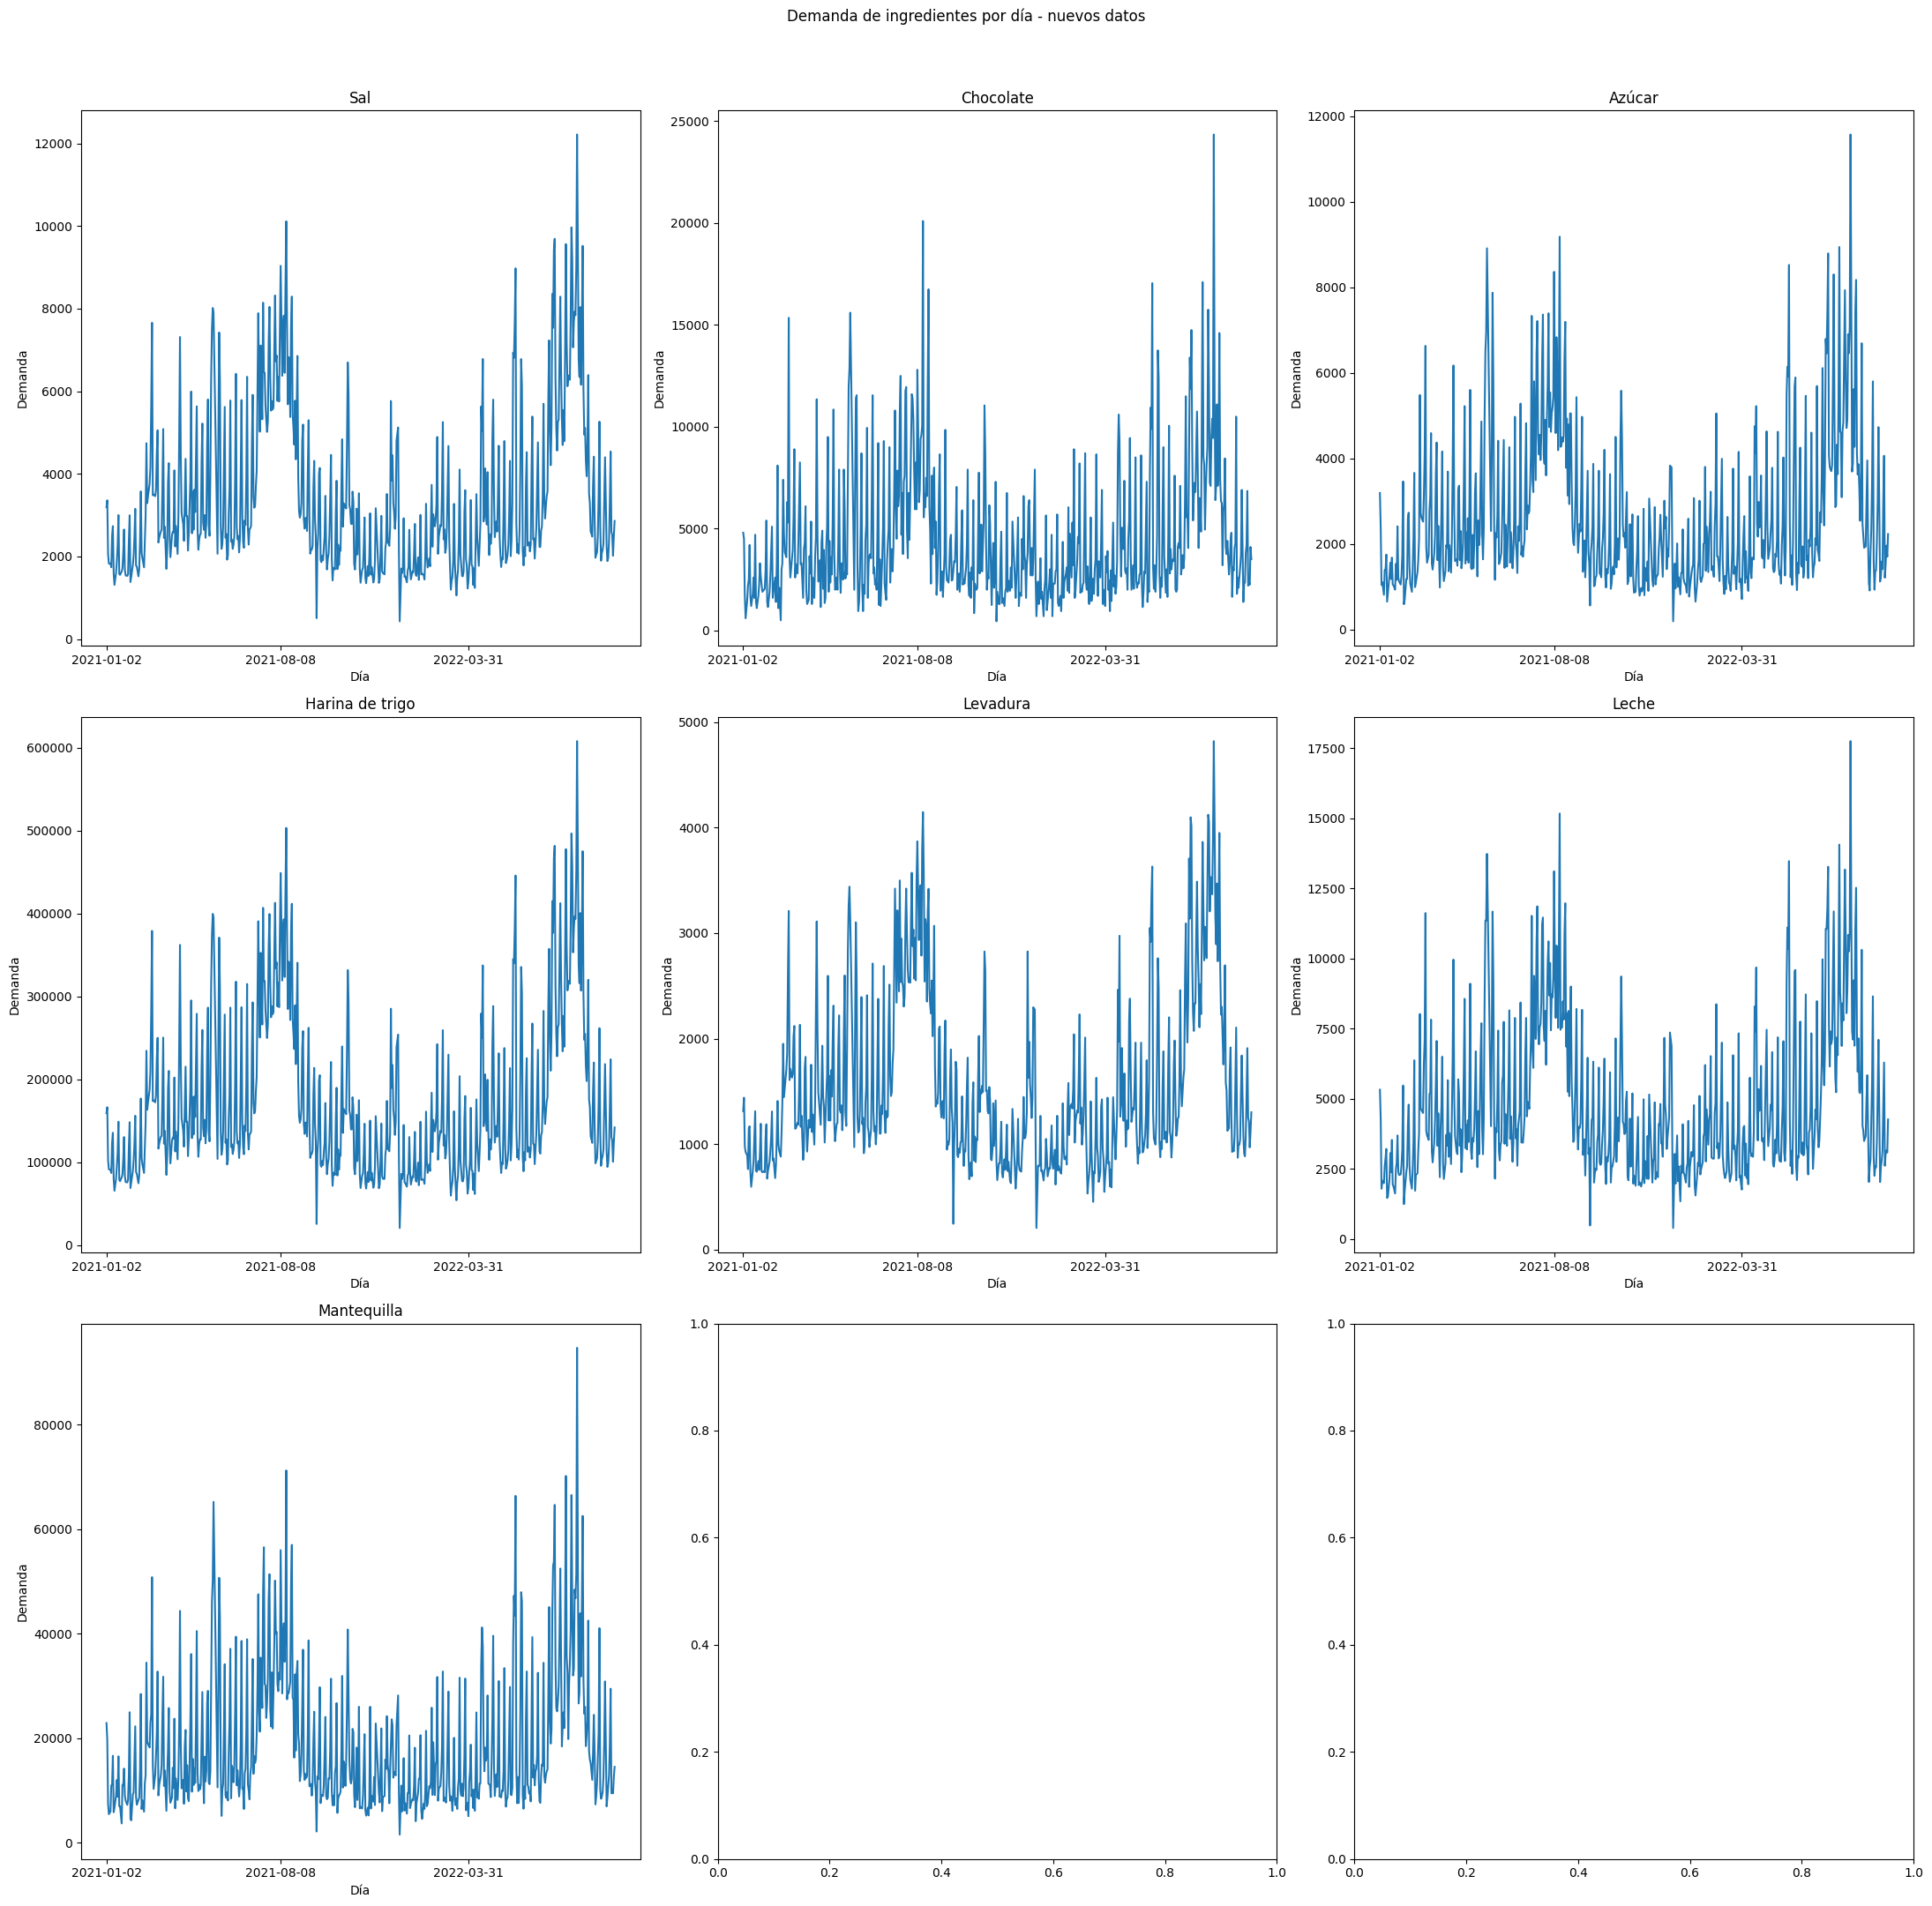

In [93]:
# Graficar las series de tiempo con los nuevos datos

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente['unique_id'].unique()) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(22, 22))

def isodate(t):
    return numpy.datetime_as_string(t, unit='D')

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente['unique_id'].unique()):
    ax = axs[i // n_c, i % n_c]
    df_ingrediente = df_demanda_ingrediente[df_demanda_ingrediente['unique_id'] == ingrediente]
    ax.plot(df_ingrediente['ds'], df_ingrediente['y'])
    ax.set_title(ingrediente)
    ax.set_xlabel("Día")
    ax.set_ylabel("Demanda")
    # Formatear las etiquetas de fecha
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])
    ax.set_xticklabels([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - nuevos datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

In [37]:
# los datos van desde 2021-01-02 a 2022-09-30. En 2022 solo tengo 3 trimestres por lo que tomo los ultimos 2 para validación. 
# Es decir, comienzo en 2021-01-02 y termino en 2022-03-31
datos = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] <= "2022-03-31"]
verificacion = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] > "2022-03-31"]
h = verificacion['ds'].nunique() # 180

print(f"h={h}")

from statsforecast import StatsForecast
from statsforecast.models import HoltWinters

model = StatsForecast(models=[HoltWinters(season_length=365, error_type='A', alias='HW_A'),
                              HoltWinters(season_length=365, error_type='M', alias='HW_M')], 
                              freq='D', n_jobs=-1)
model.fit(datos)

h=180


StatsForecast(models=[HW_A,HW_M])

> For example, data with daily observations might have a weekly seasonality (frequency=7) or an annual seasonality (frequency=365.25)
>
> https://robjhyndman.com/hyndsight/seasonal-periods/

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/tmp/ipykernel_7971/2273270649.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p['y'] = p['y'].fillna(method='ffill')


  unique_id         ds         HW_A   HW_A-lo-90   HW_A-hi-90         HW_M  \
0    Azúcar 2022-04-01  4675.525881  1427.678746  7923.373016  5258.342340   
1    Azúcar 2022-04-02  1621.051262 -1626.796920  4868.899444  1767.636407   
2    Azúcar 2022-04-03  1479.660864 -1768.188808  4727.510536  1610.032493   
3    Azúcar 2022-04-04  1847.215832 -1400.635851  5095.067514  2039.447868   
4    Azúcar 2022-04-05  2285.059621  -962.794670  5532.913912  2551.306924   

    HW_M-lo-90    HW_M-hi-90  
0 -4255.686154  14772.370835  
1 -7746.392088  11281.664901  
2 -7903.996002  11124.060987  
3 -7474.580626  11553.476363  
4 -6962.721571  12065.335418  
   index unique_id         ds         HW_A   HW_A-lo-90   HW_A-hi-90  \
0      0    Azúcar 2022-04-01  4675.525881  1427.678746  7923.373016   
1      1    Azúcar 2022-04-02  1621.051262 -1626.796920  4868.899444   
2      2    Azúcar 2022-04-03  1479.660864 -1768.188808  4727.510536   
3      3    Azúcar 2022-04-04  1847.215832 -1400.635851  

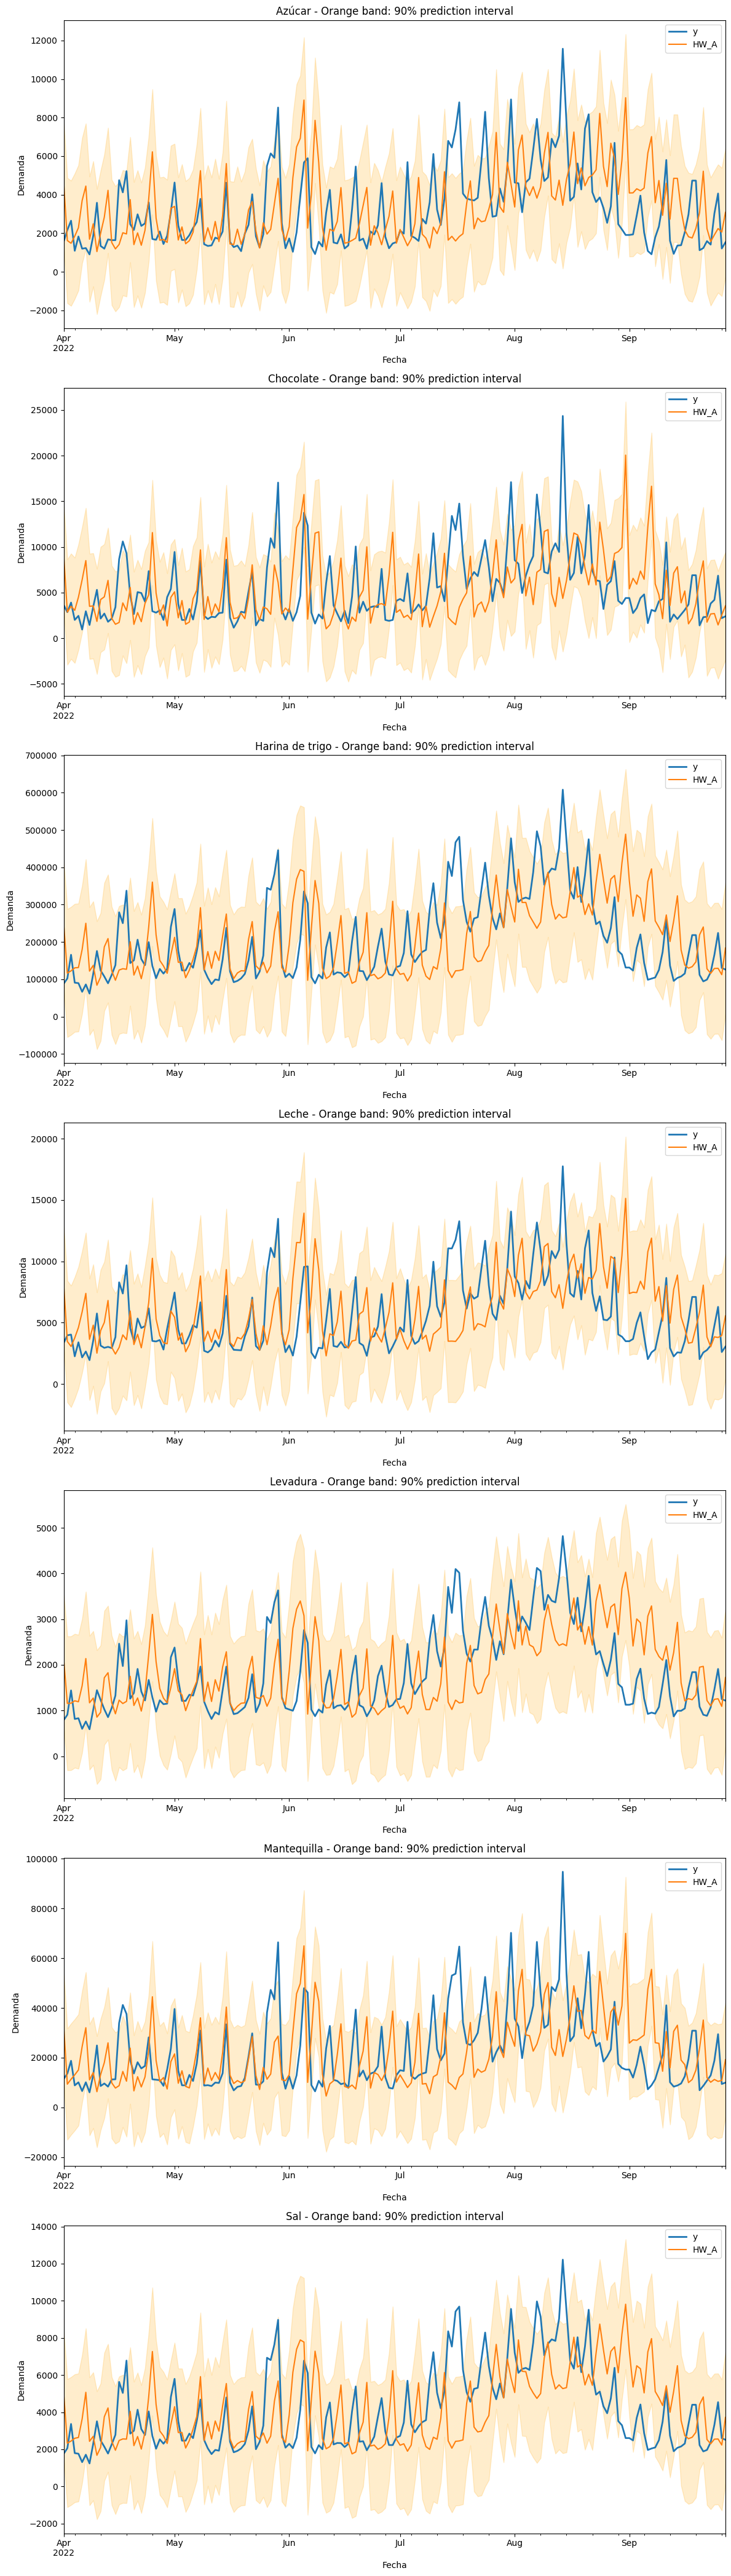

HW_M MAPE: 93.73%


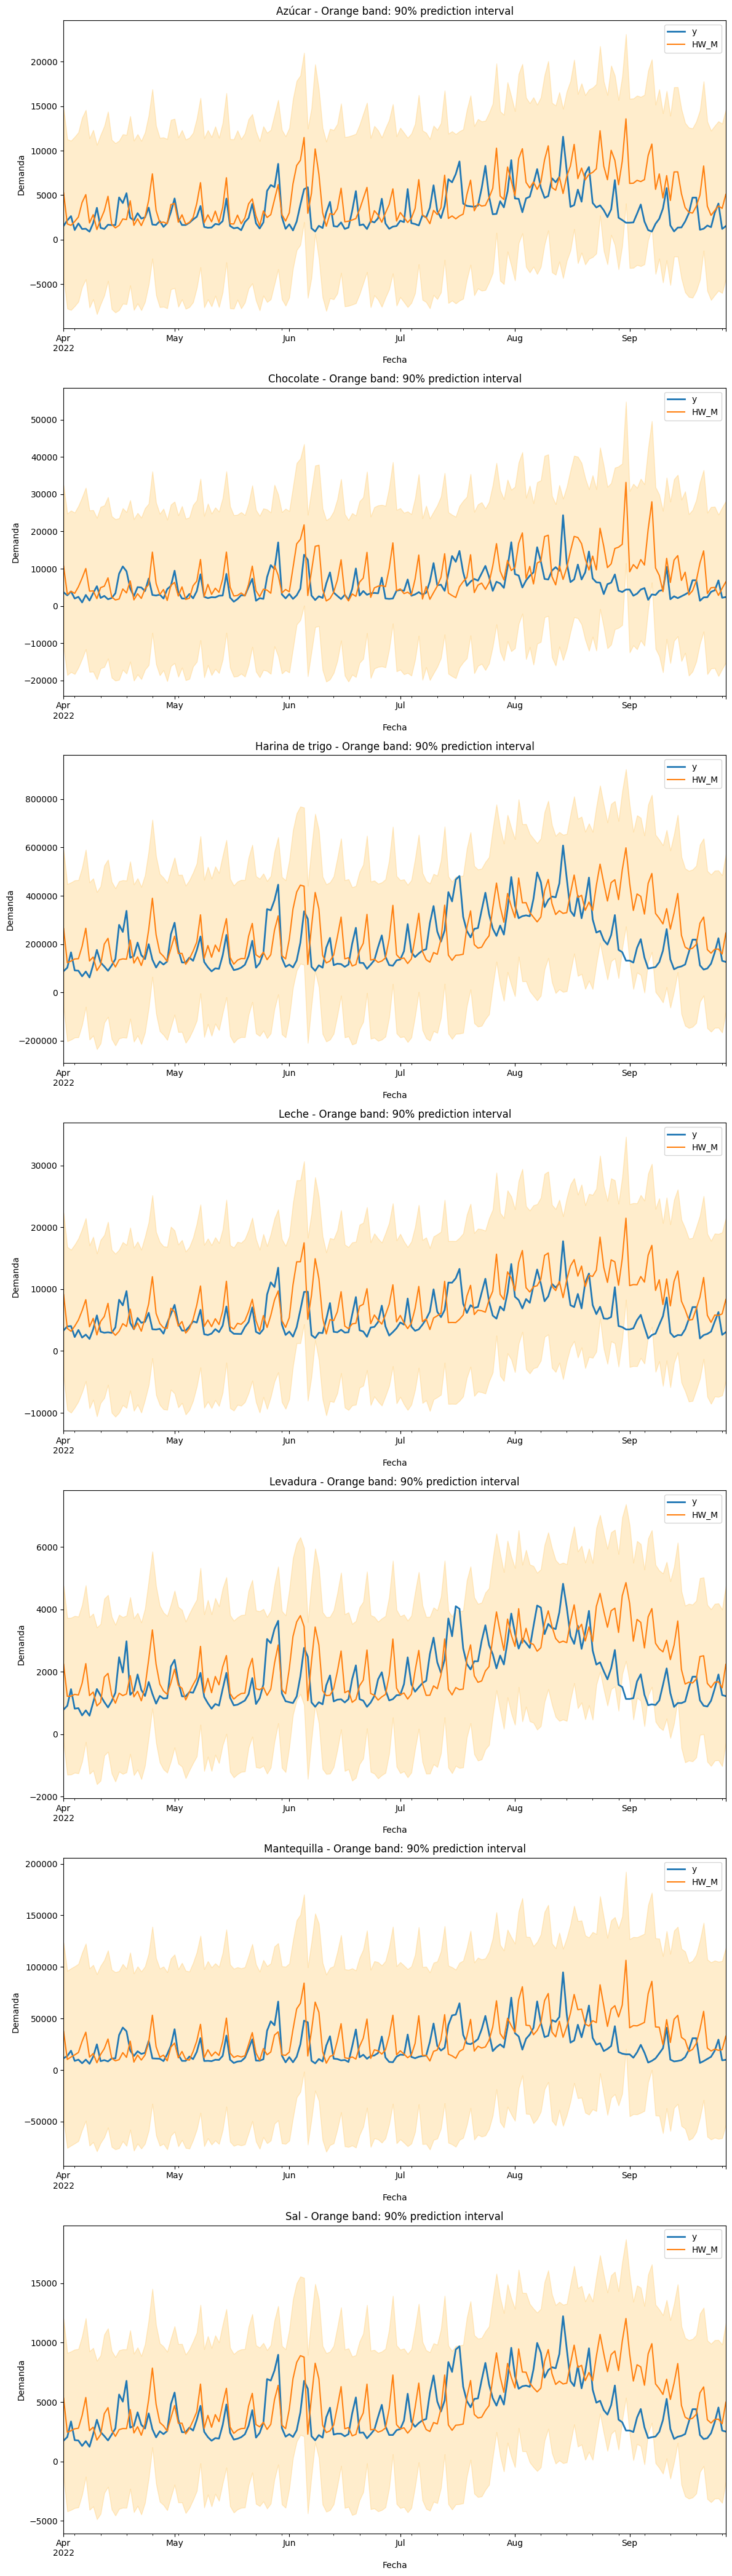

In [38]:
p = model.predict(h=h, level=[90])

print(p.reset_index().head())

p = p.reset_index().merge(verificacion, on=['ds', 'unique_id'], how='left')

print(p.reset_index().head())

# Fill NaN values in 'y' column with forward fill method
p['y'] = p['y'].fillna(method='ffill')

# plot
from sklearn.metrics import mean_absolute_percentage_error

unique_ids = p['unique_id'].unique()
num_unique_ids = len(unique_ids)

for model_ in ['HW_A', 'HW_M']:
    mape_ = mean_absolute_percentage_error(p['y'].values, p[model_].values)
    print(f'{model_} MAPE: {mape_:.2%}')
    fig, ax = plt.subplots(num_unique_ids, 1, figsize=(12, 6 * num_unique_ids))  # Increase height
    for ax_, device in enumerate(unique_ids):
        p_device = p[p['unique_id'] == device]
        p_device.plot(x='ds', y='y', ax=ax[ax_], label='y', title=device, linewidth=2)
        p_device.plot(x='ds', y=model_, ax=ax[ax_], label=model_)
        ax[ax_].set_xlabel('Fecha')
        ax[ax_].set_ylabel('Demanda')
        ax[ax_].fill_between(p_device['ds'].values,
                             p_device[f'{model_}-lo-90'], 
                             p_device[f'{model_}-hi-90'], 
                             alpha=0.2,
                             color='orange')
        ax[ax_].set_title(f'{device} - Orange band: 90% prediction interval')
        ax[ax_].legend()
    fig.tight_layout()
    plt.show()